# Data Analysis and Results

This notebook details the data analysis and the corresponding finding regarding our datasets containing Twitter data that was obtained via the Twitter API. There were five hashtags used to gather these Tweets:
1. #vaccinesarepoison
2. #vaccineskill
3. #vaccineinjured
4. #vaccinescauseautism
5. #vaxxed

Our analysis detailed in this notebook is structured in different parts:
1. Reading in the data
2. Comparing volume of tweets in each dataset
3. Identifying top accounts, hashtags and mentions and priliminarly topic modeling
4. Visualization of tweet frequency and temporal development 
5. Top term analysis and visualization
6. Topic modeling
7. Inspecting spikes in our data

## 1. Read in the Twitter data 

To work with the Twitter data we first load the corresponding csv files to our notebook. 

In [63]:
# import necessary libraries to work with our data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
autism_data_historical = pd.read_csv("tweets_vaccinescauseautism.csv")
vaccines_kill_historical = pd.read_csv('tweets_vaccineskill.csv')
vaccines_poison_historical = pd.read_csv('tweets_vaccinesarepoison.csv')
vaccine_injured_historical = pd.read_csv('tweets_vaccineinjured.csv')
vaxxed_historical = pd.read_csv('tweets_vaxxed2019.csv')

In [3]:
autism_data_2018 = pd.read_csv("tweets_autism2018.csv")
vaccines_kill_2018 = pd.read_csv('tweets_vaccineskill2018.csv')
vaccines_poison_2018 = pd.read_csv('tweets_poison2018.csv')
vaccine_injured_2018 = pd.read_csv('tweets_vaccineinjured2018.csv')
vaxxed_2018 = pd.read_csv('tweets_vaxxed2018.csv')

In [4]:
autism_data_2017 = pd.read_csv("tweets_autism2017.csv")
vaccines_kill_2017 = pd.read_csv('tweets_vaccineskill2017.csv')
vaccines_poison_2017 = pd.read_csv('tweets_poison2017.csv')
vaccine_injured_2017 = pd.read_csv('tweets_vaccineinjured2017.csv')
vaxxed_2017 = pd.read_csv('tweets_vaxxed2017.csv')

In [5]:
vaccines_kill_historical.head() # get a better sense of the data

,tweet_id,name,screen_name,acctdesc,text,usercreated,created_at,favourite_count,retweet_count,hashtags,status_count,followers_count,following_count,location,source_device
0,1252271120528465921,Dark Meat,CplBart,AONavy/11BArmy Disabled Veteran Greatest threa...,@KTLA @KTLAMorningNews No one is changing mind...,2015-06-11 01:18:05,2020-04-20 16:21:15,1,0,"[{'text': 'FakeNews', 'indices': [91, 100]}, {...",148733,3381,2725,NaN,Twitter for iPhone
1,1252987561124999169,🇺🇸(ᴘᴀᴛʀɪᴏᴛᴄᴀᴛ)🇺🇸,patriotcatsays,I am PatriotCat. 𝙸 𝚔𝚗𝚘𝚠 𝚝𝚑𝚎 𝚝𝚑𝚒𝚗𝚐𝚜. #Knowledge...,@keithellison “dignity”? By trying to lift the...,2019-12-19 21:08:40,2020-04-22 15:48:08,0,0,"[{'text': 'abortedfetalcells', 'indices': [54,...",2540,128,321,NaN,Twitter for iPhone
2,1253775889701224454,LotusOak,LotusOak2,"❦ God, please give me the grace to accept the ...","1-Year Old Dies After 6 #Vaccine Doses, Death ...",2011-11-30 01:40:51,2020-04-24 20:00:40,37,44,"[{'text': 'Vaccine', 'indices': [24, 32]}, {'t...",94097,43620,38621,NaN,Vaccines and Homeopathy News
3,1253742643542216705,Peliroja Mama,PelirojaMama,NaN,@Karl_E_B @Natalie60444115 @TS_SCI_MAJIC12 Dig...,2012-11-15 16:12:24,2020-04-24 17:48:34,0,0,"[{'text': 'VaccinesKill', 'indices': [267, 280...",1777,100,177,NaN,Twitter for Android
4,1254477614820913153,LoboPac,PepeLoboPac,God Fearing Dog Father \nIn SEARCH of the TRUTH.,[THEY] hate to see a #StableGenius at work 😏.\...,2013-11-10 17:17:37,2020-04-26 18:29:05,3,1,"[{'text': 'StableGenius', 'indices': [21, 34]}...",10882,433,712,NaN,Twitter for Android


In [6]:
autism_data_2018.shape # get the number of rows and columns of a dataset

(872, 15)

## 2. Comparing the volume of Tweets
After having loaded the different datasets we would like to compare them and determine the number of Tweets that each of the search queries specified above yielded. 

In [7]:
# gather all datasets 
datasets = [autism_data_historical, autism_data_2018, autism_data_2017, vaccines_kill_historical, vaccines_kill_2018, 
            vaccines_kill_2017, vaccines_poison_historical, vaccines_poison_2018, vaccines_poison_2017,
            vaccine_injured_historical, vaccine_injured_2018, vaccine_injured_2017, vaxxed_historical, vaxxed_2018, 
            vaxxed_2017]

In [8]:
# gathering the number of rows in each dataset
numRows = [data.shape[0] for data in datasets] 

In [9]:
# creating a column with our data set names
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

names = [get_df_name(d) for d in datasets] 

In [10]:
names

['autism_data_historical',
 'autism_data_2018',
 'autism_data_2017',
 'vaccines_kill_historical',
 'vaccines_kill_2018',
 'vaccines_kill_2017',
 'vaccines_poison_historical',
 'vaccines_poison_2018',
 'vaccines_poison_2017',
 'vaccine_injured_historical',
 'vaccine_injured_2018',
 'vaccine_injured_2017',
 'vaxxed_historical',
 'vaxxed_2018',
 'vaxxed_2017']

In [11]:
tweetTable = pd.DataFrame(names, columns = ['dataset'])
tweetTable['numtweets'] = numRows

In [12]:
tweetTable

,dataset,numtweets
0,autism_data_historical,418
1,autism_data_2018,872
2,autism_data_2017,133
3,vaccines_kill_historical,2192
4,vaccines_kill_2018,1512
5,vaccines_kill_2017,838
6,vaccines_poison_historical,602
7,vaccines_poison_2018,161
8,vaccines_poison_2017,39
9,vaccine_injured_historical,1168


In [13]:
# number of tweets in our datasets 
tweetTable['numtweets'].sum()

43041

## 3. Identifying top accounts
In the next step, we will look at each dataset individually as well as the combined datasets for each query to identify the users who have tweeted the most

In [152]:
# merging the datasets, one for each search query
autism = [autism_data_historical, autism_data_2018, autism_data_2017]
autism_all = pd.concat(autism, ignore_index=True)

kill = [vaccines_kill_historical, vaccines_kill_2018, vaccines_kill_2017]
kill_all = pd.concat(kill, ignore_index=True)

poison = [vaccines_poison_historical, vaccines_poison_2018, vaccines_poison_2017]
poison_all = pd.concat(poison, ignore_index=True)

injured = [vaccine_injured_historical, vaccine_injured_2018, vaccine_injured_2017]
injured_all = pd.concat(injured, ignore_index=True)

vaxxed = [vaxxed_historical, vaxxed_2018, vaxxed_2017]
vaxxed_all = pd.concat(vaxxed, ignore_index=True)

datasets_merged = [autism_all, kill_all,poison_all, injured_all, vaxxed_all]

all_data = pd.concat(datasets, ignore_index=True) # datasets will all tweets

In [161]:
# 2019 - 2020 dataset only 
data2020 = [vaxxed_historical, vaccine_injured_historical, vaccines_poison_historical, vaccines_kill_historical, autism_data_historical]

all_data2020 = pd.concat(data2020, ignore_index=True) 


In [162]:
all_data2020.head()

,tweet_id,name,screen_name,acctdesc,text,usercreated,created_at,favourite_count,retweet_count,hashtags,status_count,followers_count,following_count,location,source_device
0,1210318904461078530,MamaForMedicalFreedom,MamaFreedom,Awoken mama fighting for religious freedom in NY,@JohnLeguizamo Please help the families of NJ ...,2019-07-21 13:18:32,2019-12-26 21:58:08,0,0,"[{'text': 'veto2173', 'indices': [239, 248]}, ...",1009,131,244,NaN,Twitter for iPhone
1,1209635620299116544,Happy Camper,HappyBigGrin,"💓God🙏Country, Small Govt, Holistic Health, ExV...",Wow!!!😮 Just listen....👇👇👇\n\n#Vaxxed https://...,2018-12-16 17:00:02,2019-12-25 00:43:00,4,1,"[{'text': 'Vaxxed', 'indices': [28, 35]}]",52511,2891,2122,NaN,Twitter for Android
2,1211109973955989504,"Dr. Thomas Paul, Therapist #MindBody",DrThomasPaul,Past Life Regression Center® Founder; Therapis...,"If you like my tweets, almost every tweet I've...",2013-06-30 20:22:18,2019-12-29 02:21:33,9,9,"[{'text': 'vaxxed', 'indices': [223, 230]}, {'...",86936,65007,58953,NaN,Twitter Web App
3,1209586022478163969,Truth Speaks #APMC #IStandWithFarmersBill,TruthSpeaksTS,"FOLLOW DHARMAॐ,PERIOD. Hindu, NRIndian,తెలుగు(...",This directly applies to current day topics:\n...,2013-03-15 22:15:59,2019-12-24 21:25:55,4,3,"[{'text': 'VaccineInjury', 'indices': [189, 20...",351610,2310,810,NaN,Twitter Web App
4,1211697346515353606,"Maria Magdalen Rivera, TM",MariaRivera_OC,Patriotic homeschool mama & businesswoman. STO...,@TheDailyShow @RepAdamSchiff #Patriots stand w...,2015-06-02 04:23:54,2019-12-30 17:15:34,0,0,"[{'text': 'Patriots', 'indices': [29, 38]}, {'...",6757,335,324,NaN,Twitter for iPhone


In [15]:
import collections
import itertools

def topAccounts(data, topNum):
    """
    given a datasets returns the specified number (topNum of them) of accounts who tweeted the most 
    """
    freqCount = data['screen_name'].value_counts() # counts the frequency of each username
    freqDict = freqCount.to_dict() # creates a frequency dictionary
    
    sorted_data = collections.OrderedDict(freqDict) # conversion to a sorted dictionary
    # Initialize limit  
    N = topNum # number of top tweeters we want to collect  
    topTweeters = dict(itertools.islice(sorted_data.items(), N))
    return topTweeters

## 3.1 Identifying top accounts in individual datasets

In [16]:
allTopAccounts = [topAccounts(d,10) for d in datasets] # identifies top 10 accounts in each dataset

allTopAccounts[3] # a sample output for our dataset for the search query vaccines kill

{'LotusOak2': 108,
 'QTEAM1776': 87,
 'constantin_t': 69,
 'yattypat': 67,
 'SuzanneV99': 64,
 'vine1975': 55,
 'KaraQBell1': 44,
 'HatgiNeal': 44,
 'ThePeoplesPoet6': 39,
 'DayaTomPhoto': 32}

In [17]:
tweetTable["topaccounts"] = allTopAccounts # add a column to our table about our tweet data 

In [18]:
tweetTable # how our table looks after adding column with top accounts 

,dataset,numtweets,topaccounts
0,autism_data_historical,418,"{'LotusOak2': 110, 'and_kell': 75, 'aspiesmom'..."
1,autism_data_2018,872,"{'and_kell': 89, 'LotusOak2': 85, 'avoiceforch..."
2,autism_data_2017,133,"{'and_kell': 39, 'AutismWarriorNY': 10, 'avoic..."
3,vaccines_kill_historical,2192,"{'LotusOak2': 108, 'QTEAM1776': 87, 'constanti..."
4,vaccines_kill_2018,1512,"{'LotusOak2': 188, 'avoiceforchoice': 175, 'co..."
5,vaccines_kill_2017,838,"{'avoiceforchoice': 222, 'forcedanarchy': 56, ..."
6,vaccines_poison_historical,602,"{'JACKIE_134': 31, 'Flying_Shadowz': 18, 'rise..."
7,vaccines_poison_2018,161,"{'avoiceforchoice': 37, 'JEMLIVEFREE': 16, 'Ch..."
8,vaccines_poison_2017,39,"{'avoiceforchoice': 12, 'Paraphraze615': 2, 'A..."
9,vaccine_injured_historical,1168,"{'LotusOak2': 340, 'and_kell': 46, 'Da12adore'..."


## 3.2 Identifying top accounts for each hashtag
After having examined the top accounts for each dataset we look at the data for each search query as a whole and look to see if there are any differences in comparison to our findings from before.

In [19]:
topAcct = [topAccounts(d,10) for d in datasets_merged]
accountFreq = [topAccounts(d,d.shape[0]) for d in datasets_merged] # frequency of all accounts

In [26]:
# extract names of our merged datasets 
datasetNames = [get_df_name(df) for df in datasets_merged]

# create dataframe with our account data 
topAcct_df = pd.DataFrame(topAcct).T
topAcct_df.columns = datasetNames

topAcct_df # top accounts for all datasets and where they appear

,autism_all,kill_all,poison_all,injured_all,vaxxed_all
and_kell,203.0,NaN,NaN,73.0,NaN
LotusOak2,195.0,296.0,NaN,340.0,1877.0
aspiesmom,86.0,NaN,NaN,21.0,673.0
avoiceforchoice,57.0,397.0,49.0,23.0,NaN
AutismWarriorNY,25.0,NaN,NaN,NaN,NaN
MrsLiberator,24.0,NaN,NaN,NaN,NaN
RTAHealth,23.0,NaN,NaN,NaN,NaN
yattypat,21.0,82.0,NaN,NaN,NaN
JaneSmith659,15.0,NaN,NaN,46.0,NaN
tnynfox,12.0,NaN,NaN,NaN,NaN


In [21]:
topAcct_df.shape # gives us the number of top accounts over all 5 hashtags

(39, 5)

## 3.3 Top user analysis
We had examined the top users over all the different hashtags. Now we want to dive deeper into these accounts and look at their follower count, number of tweets they wrote as well as how long they have been active on Twitter.

In [51]:
all_data.sort_values('followers_count', ascending=False)

,tweet_id,name,screen_name,acctdesc,text,usercreated,created_at,favourite_count,retweet_count,hashtags,status_count,followers_count,following_count,location,source_device
643,1126939225344106496,SkyNews,SkyNews,We take you to the heart of the stories that s...,Anti-vaccination hashtags such as #vaccinescau...,2007-07-19 14:42:53,2019-05-10 19:57:03,106.0,27.0,"[{'text': 'vaccinescauseautism', 'indices': [3...",420874,6406464.0,27.0,NaN,SocialFlow
6623,1126939225344106496,SkyNews,SkyNews,We take you to the heart of the stories that s...,Anti-vaccination hashtags such as #vaccinescau...,2007-07-19 14:42:53,2019-05-10 19:57:03,106.0,27.0,"[{'text': 'vaccinescauseautism', 'indices': [3...",420874,6406463.0,27.0,NaN,SocialFlow
4559,1126978743535382528,The Hill,thehill,The Hill is the premier source for policy and ...,"Instagram blocks #vaccineskill hashtag, review...",2007-03-22 18:15:18,2019-05-10 22:34:05,53.0,11.0,"[{'text': 'vaccineskill', 'indices': [17, 30]}]",788570,3965701.0,266.0,NaN,SocialFlow
4583,1127058767860965376,The Hill,thehill,The Hill is the premier source for policy and ...,"Instagram blocks #vaccineskill hashtag, review...",2007-03-22 18:15:18,2019-05-11 03:52:04,59.0,20.0,"[{'text': 'vaccineskill', 'indices': [17, 30]}]",788570,3965701.0,266.0,NaN,SocialFlow
4618,1126907010795098112,The Hill,thehill,The Hill is the premier source for policy and ...,"Instagram blocks"" #vaccineskill"" hashtag, revi...",2007-03-22 18:15:18,2019-05-10 17:49:02,35.0,7.0,"[{'text': 'vaccineskill', 'indices': [18, 31]}]",788570,3965701.0,266.0,NaN,SocialFlow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7307,1235658357354029056,Antonia Wilemon,AntoniaWilemon,NaN,When will #DoctorsSpeakUp that the #vaccineInj...,2018-11-10 13:36:55,2020-03-05 20:08:04,0.0,0.0,"[{'text': 'DoctorsSpeakUp', 'indices': [10, 25...",10,0.0,8.0,NaN,Twitter for iPhone
33038,908314465413750784,💧Maree K,5151mpk,"Animal care, environment, anti-bullying/corrup...",@sallymcmanus Lucy Turnbull chairwoman.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33039,$5.5million stake.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33040,Prima Biomed.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
allTopAccountNames[0]
all_data_Top = all_data.copy()
all_data_Top.set_index("screen_name", inplace=True)
all_data_Top.head()

,tweet_id,name,acctdesc,text,usercreated,created_at,favourite_count,retweet_count,hashtags,status_count,followers_count,following_count,location,source_device
screen_name,,,,,,,,,,,,,,
LotusOak2,1252591941491007488,LotusOak,"❦ God, please give me the grace to accept the ...",#HearThisWell: 250+ Parents of Kids with #Auti...,2011-11-30 01:40:51,2020-04-21 13:36:05,75.0,65.0,"[{'text': 'HearThisWell', 'indices': [0, 13]},...",94097,43621.0,38621.0,NaN,Vaccines and Homeopathy News
aspiesmom,1248383421765697542,aspiesmom,Fighting for disabled adult son's health/human...,"@HillaryClinton You also say ""vaccines work""\n...",2011-07-24 19:37:58,2020-04-09 22:52:56,10.0,5.0,"[{'text': 'AutismAwarenessApril2020', 'indices...",303300,7656.0,7701.0,NaN,Twitter Web App
aspiesmom,1252117253073645569,aspiesmom,Fighting for disabled adult son's health/human...,@NBCNews #AutismAwarenessApril2020 #VaccinesCa...,2011-07-24 19:37:58,2020-04-20 06:09:51,1.0,1.0,"[{'text': 'AutismAwarenessApril2020', 'indices...",303300,7656.0,7701.0,NaN,Twitter Web App
aspiesmom,1246479132952858624,aspiesmom,Fighting for disabled adult son's health/human...,@thomaskaine5 #AutismAwarenessApril2020&gt;#Va...,2011-07-24 19:37:58,2020-04-04 16:45:58,0.0,2.0,"[{'text': 'AutismAwarenessApril2020', 'indices...",303300,7656.0,7701.0,NaN,Twitter Web App
LotusOak2,1247842404205506560,LotusOak,"❦ God, please give me the grace to accept the ...",A government medical expert - used to debunk l...,2011-11-30 01:40:51,2020-04-08 11:03:07,22.0,27.0,"[{'text': 'vaccines', 'indices': [59, 68]}, {'...",94097,43621.0,38621.0,NaN,Vaccines and Homeopathy News


In [55]:
all_data_Top.loc[allTopAccountNames[0]]['followers_count'][0]
all_data_Top.loc[allTopAccountNames[0]]['usercreated'][0]

'2009-05-06 18:25:00'

In [82]:
def topAccountsInfo(topAccountNames, dataset):
    """ 
    returns a dataframe that includes the number of follower and how long a particular account has existed 
    """
    numberOfRows = len(topAccountNames)
    topAcct_df = pd.DataFrame(index=np.arange(0, numberOfRows), columns=['user_name', 'followers_count', 'following_count','usercreated'])
    
    for i in range(len(topAccountNames)): 
        name = topAccountNames[i]
        topAcct_df.loc[i] = [name, dataset.loc[name]['followers_count'][0],dataset.loc[name]['following_count'][0],dataset.loc[name]['usercreated'][0]]
    
    return topAcct_df

In [83]:
topAcctData = topAccountsInfo(allTopAccountNames, all_data)

In [84]:
topAcctData

,user_name,followers_count,following_count,usercreated
0,and_kell,4481,1746,2009-05-06 18:25:00
1,LotusOak2,43621,38621,2011-11-30 01:40:51
2,aspiesmom,7656,7701,2011-07-24 19:37:58
3,avoiceforchoice,7866,666,2015-05-22 02:58:19
4,AutismWarriorNY,1651,616,2009-04-23 21:10:29
5,MrsLiberator,432,675,2012-12-13 07:54:50
6,RTAHealth,2157,1103,2013-04-05 12:19:31
7,yattypat,3274,3481,2009-05-21 14:10:21
8,JaneSmith659,314,392,2015-01-03 20:47:32
9,tnynfox,853,4996,2018-10-10 22:16:58


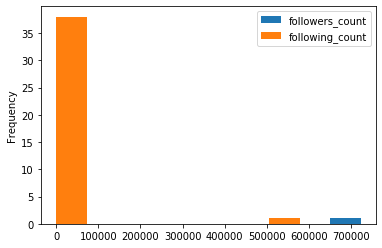

In [85]:
topAcctData.plot.hist()

In [88]:
topAcctData.sort_values('usercreated')

,user_name,followers_count,following_count,usercreated
30,dominique6138,849,1348,2008-03-23 23:55:18
11,forcedanarchy,2254,1965,2008-04-14 04:35:21
34,TannersDad,20905,21859,2008-10-19 18:44:28
32,CollChris,722608,555597,2009-02-09 03:51:55
4,AutismWarriorNY,1651,616,2009-04-23 21:10:29
0,and_kell,4481,1746,2009-05-06 18:25:00
7,yattypat,3274,3481,2009-05-21 14:10:21
17,JACKIE_134,312,376,2009-06-30 07:20:16
26,FLAutismMom,1294,1516,2009-08-20 19:35:05
31,SNCCLA,5428,5422,2010-02-21 22:39:18


In [604]:
topAcctData['followers_count'].median()

1834.0

In [605]:
topAcctData['following_count'].median()

1516.0

In [608]:
topAcctData['usercreated'] = pd.to_datetime(topAcctData['usercreated'])
topAcctData['usercreated'].mean()

Timestamp('2013-11-06 15:14:11.743589376')

## 3.4 Visualizing frequency

In [23]:
dataFramesList = [pd.DataFrame(accountFreq[i].items(), columns = ["username", "numTweets"]) 
                  for i in range(len(datasets_merged))]
dataFramesList

[            username  numTweets
 0           and_kell        203
 1          LotusOak2        195
 2          aspiesmom         86
 3    avoiceforchoice         57
 4    AutismWarriorNY         25
 ..               ...        ...
 587     derekarrighi          1
 588     SonOfTaharqa          1
 589  subjecttochance          1
 590      DavidBeKing          1
 591    tomascamara03          1
 
 [592 rows x 2 columns],
              username  numTweets
 0     avoiceforchoice        397
 1           LotusOak2        296
 2        constantin_t        124
 3       forcedanarchy        104
 4           QTEAM1776         87
 ...               ...        ...
 1353         BShapero          1
 1354          tmnakwa          1
 1355   SevenFlamingos          1
 1356   Jae_Byrd_Wells          1
 1357      debrose1720          1
 
 [1358 rows x 2 columns],
             username  numTweets
 0    avoiceforchoice         49
 1         JACKIE_134         31
 2        JEMLIVEFREE         24
 3     Fl

In [27]:
def plotFrequency(dataframe, dataName, hist=True):
    fig, ax = plt.subplots(2, 2)
    if hist:
        ax = dataframe.groupby('numTweets').count().plot.hist()
    else:
        ax = dataframe.groupby('numTweets').count().plot.bar()
    plt.title("Number of tweets for users from " + dataName + " dataset")
    ax.set_xlabel("number of tweets")
    ax.set_ylabel("frequency")

In [40]:
#creating bar plots for all queries
plotFrequency(dataFramesList[0], "vaccines cause autism")
plotFrequency(dataFramesList[1], "vaccines kill")
plotFrequency(dataFramesList[2], "vaccine are poison")
plotFrequency(dataFramesList[3], "vaccine injured")
plotFrequency(dataFramesList[4], "vaxxed")

array([1.04930431, 0.86609917, 0.5511346 ])

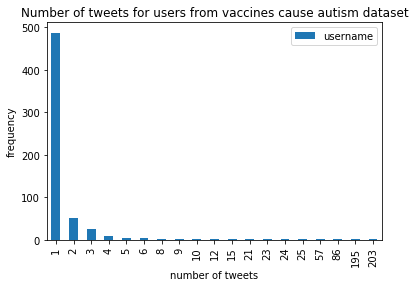

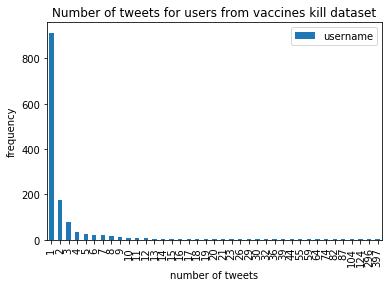

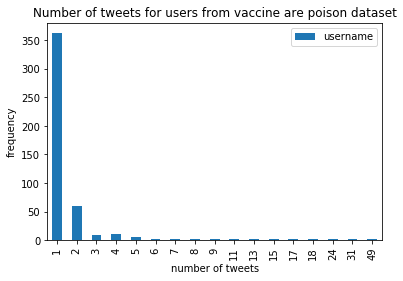

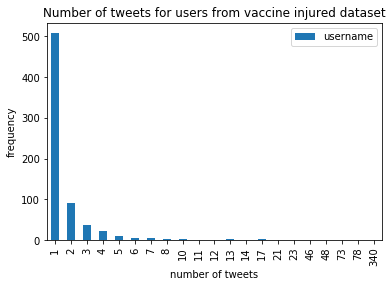

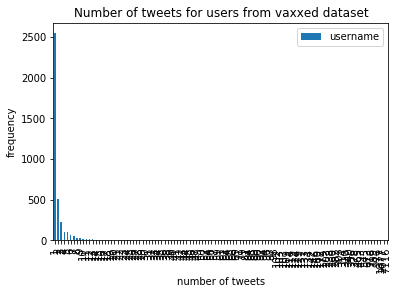

In [452]:
#creating tweet distribution plots (histograms) for all queries
plotFrequency(dataFramesList[0], "vaccines cause autism", False)
plotFrequency(dataFramesList[1], "vaccines kill", False)
plotFrequency(dataFramesList[2], "vaccine are poison", False)
plotFrequency(dataFramesList[3], "vaccine injured", False)
plotFrequency(dataFramesList[4], "vaxxed", False)

## 3.3 Top accounts overall
After having examined the top accounts for each hashtag we go to find the top accounts from our dataset of all tweets.

In [66]:
topAll = topAccounts(all_data, 50)

In [67]:
topAll_df = pd.DataFrame(topAll.items(), columns = ["user", "numTweets"]) # dataframe with top 50 accounts 
topAll_df.head(10) # look at top 10 accounts in our dataframe

,user,numTweets
0,SNCCLA,7123
1,LotusOak2,2708
2,CollChris,2077
3,deb16wood,978
4,TannersDad,789
5,aspiesmom,787
6,susan_welch7,716
7,avoiceforchoice,624
8,joejoe80495073,549
9,thereal_truther,493


In 3.2 we visualized the frequency of tweets each individual user posted within each data, but we did not examine the the overall number of tweets each user produced over the three year time period.

In [454]:
allAcctFreq = topAccounts(all_data, all_data.shape[0])
allFreq_df = pd.DataFrame(allAcctFreq.items(), columns = ["user", "numTweets"]) 
allFreq_df.head(10)

,user,numTweets
0,SNCCLA,7123
1,LotusOak2,2708
2,CollChris,2077
3,deb16wood,978
4,TannersDad,789
5,aspiesmom,787
6,susan_welch7,716
7,avoiceforchoice,624
8,joejoe80495073,549
9,thereal_truther,493


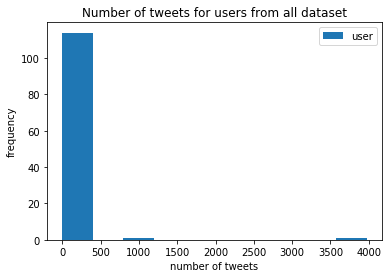

In [74]:
# plotting the frequency of tweets
plotFrequency(allFreq_df, "all")

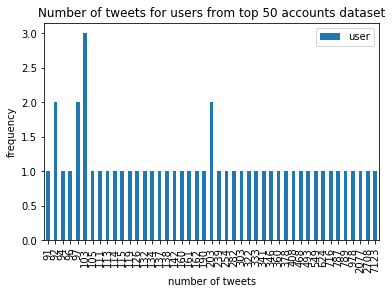

In [73]:
#plotting only top 50 accounts
plotFrequency(topAll_df, "top 50 accounts", False)

## 3.4 Analyzing tweet length
Aside from the number of tweets each user published we are also interested in the tweets and their lengths. A tweet can have a maximum length of 280 characters therefore we identify the length of tweets as well as create a visualization of the distribution of lengths.

In [ ]:
# plot tweet lengths
plt.figure(figsize=(15,10))
doc_lens = [len(d) for d in all_data_rt.text] 
plt.hist(doc_lens, bins = 80)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')


In [ ]:
# calculate mean and median length of tweets
import statistics
statistics.mean(doc_lens)
statistics.median(doc_lens)

## 3.5 Identifying retweets
We create a copy our dataset and identify if tweets are retweets. From the retweeted tweets we identify the tweets that recieved the most retweets.  

In [388]:
# make a copy of our dataset to perform manimpulations and collect the mentions and hashtags 
all_data_rt = all_data.copy()

In [389]:
all_data_rt.text = all_data_rt.text.astype(str)

In [390]:
all_data_rt['is_retweet'] = all_data_rt['text'].apply(lambda x: x[:2]=='RT') # identify if a tweet is a retweet

In [391]:
all_data_rt['is_retweet'].sum() # number of tweets that are retweets

78

In [392]:
# 10 most repeated tweets
all_data_rt.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,text,counts
38383,Who’s your favorite women's footballer of all ...,87
1808,#VAXXED Stories: Mom of 6 Saved Her Daughter w...,54
21468,Dr. Anthony Phan On #Vaccines - Doctor Tearful...,50
19778,Can you imagine living in hope to outlive your...,45
17313,A government medical expert - used to debunk l...,45
38094,When will #DoctorsSpeakUp that the #vaccineinj...,45
31669,"Robert De Niro: ""Everyone Should See #VAXXED""\...",40
20555,"Dear Mothers, please watch this #video before ...",38
37358,Watch the entire impassioned speech by Sheila ...,32
24064,Here is the link to FREE full version of #VAXX...,30


## 3.6 Identifying top hashtags and mentions
After having classified the tweet frequency of tweets we are interested in their content and what users as well as hashtags they contain. We also start by finding the top tweets that are retweeted. 

In [328]:
def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [393]:
# make new columns for mentioned usernames and hashtags
all_data_rt['mentioned'] = all_data_rt.text.apply(find_mentioned)
all_data_rt['hashtags'] = all_data_rt.text.apply(find_hashtags)

In [394]:
all_data_rt

,tweet_id,name,screen_name,acctdesc,text,usercreated,created_at,favourite_count,retweet_count,hashtags,status_count,followers_count,following_count,location,source_device,is_retweet,mentioned
0,1252591941491007488,LotusOak,LotusOak2,"❦ God, please give me the grace to accept the ...",#HearThisWell: 250+ Parents of Kids with #Auti...,2011-11-30 01:40:51,2020-04-21 13:36:05,75.0,65.0,"[#HearThisWell, #Autism, #Vaccines, #LearnTheR...",94097,43621.0,38621.0,NaN,Vaccines and Homeopathy News,False,[]
1,1248383421765697542,aspiesmom,aspiesmom,Fighting for disabled adult son's health/human...,"@HillaryClinton You also say ""vaccines work""\n...",2011-07-24 19:37:58,2020-04-09 22:52:56,10.0,5.0,"[#AutismAwarenessApril2020, #HearThisWell, #Va...",303300,7656.0,7701.0,NaN,Twitter Web App,False,[@HillaryClinton]
2,1252117253073645569,aspiesmom,aspiesmom,Fighting for disabled adult son's health/human...,@NBCNews #AutismAwarenessApril2020 #VaccinesCa...,2011-07-24 19:37:58,2020-04-20 06:09:51,1.0,1.0,"[#AutismAwarenessApril2020, #VaccinesCauseAuti...",303300,7656.0,7701.0,NaN,Twitter Web App,False,"[@NBCNews, @congbillposey]"
3,1246479132952858624,aspiesmom,aspiesmom,Fighting for disabled adult son's health/human...,@thomaskaine5 #AutismAwarenessApril2020&gt;#Va...,2011-07-24 19:37:58,2020-04-04 16:45:58,0.0,2.0,"[#AutismAwarenessApril2020, #VaccinesCauseAuti...",303300,7656.0,7701.0,NaN,Twitter Web App,False,[@thomaskaine5]
4,1247842404205506560,LotusOak,LotusOak2,"❦ God, please give me the grace to accept the ...",A government medical expert - used to debunk l...,2011-11-30 01:40:51,2020-04-08 11:03:07,22.0,27.0,"[#vaccines, #Autism, #Zimmerman, #VaccinesCaus...",94097,43621.0,38621.0,NaN,Vaccines and Homeopathy News,False,[@SharylAttkisson]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43036,959917078449881088,Jon Rappoport,jonrappoport,Investigative reporter for over 30 years. http...,#Vaxxed: CDC caught pimping toxic flu vaccines...,2010-03-17 20:54:50,2018-02-03 22:30:40,105.0,119.0,"[#Vaxxed, #PatriotChallenge]",4748,48428.0,11415.0,NaN,Twitter Web Client,False,[]
43037,959544111438155781,Silver Babe,yarrs,Reiki Master Teacher & @ArcadiaEconomic Market...,@BeckyJohnson222 For the sake of our kids we h...,2008-11-01 15:56:52,2018-02-02 21:48:38,0.0,0.0,"[#VAXXED, #vaccine, #LotusOak]",17478,1516.0,1260.0,NaN,Convey: Make it post for you,False,"[@BeckyJohnson222, @c0nvey]"
43038,959009924280913920,Sallie O. Elkordy,VaccineFreeNYC,Blog: https://t.co/pt1eMTCloW\nBlogtalkradio:...,"Vaccines during Pregnancy? ""NO""!!! https://t....",2015-01-08 02:56:58,2018-02-01 10:25:58,0.0,4.0,"[#RFKCommission, #JusticeOrElse, #MAGA, #OUTLA...",2102,856.0,324.0,NaN,Twitter Web Client,False,"[@BenSwann_, @SharylAttkisson, @ThisMomHCN, @M..."
43039,958954626346311680,Ana Morcodeanu,AnaMmorcodeanu,licensed New York State Professional.,I am a doctor and I now know the truth about v...,2016-02-12 19:57:42,2018-02-01 06:46:14,0.0,0.0,"[#vaxxed, #DidYouKno]",85,9.0,38.0,NaN,Twitter Web Client,False,[@YouTube]


In [395]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = all_data_rt.loc[
                       all_data_rt.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [396]:
hashtags_list_df

,hashtags
0,"[#HearThisWell, #Autism, #Vaccines, #LearnTheR..."
1,"[#AutismAwarenessApril2020, #HearThisWell, #Va..."
2,"[#AutismAwarenessApril2020, #VaccinesCauseAuti..."
3,"[#AutismAwarenessApril2020, #VaccinesCauseAuti..."
4,"[#vaccines, #Autism, #Zimmerman, #VaccinesCaus..."
...,...
43036,"[#Vaxxed, #PatriotChallenge]"
43037,"[#VAXXED, #vaccine, #LotusOak]"
43038,"[#RFKCommission, #JusticeOrElse, #MAGA, #OUTLA..."
43039,"[#vaxxed, #DidYouKno]"


In [397]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [398]:
flattened_hashtags_df

,hashtag
0,#HearThisWell
1,#Autism
2,#Vaccines
3,#LearnTheRisk
4,#VaccineInjury
...,...
184203,#Vaxxed
184204,#HearThisWell
184205,#vaxxed
184206,#DidYouKno


In [399]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

14695

In [400]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [401]:
popular_hashtags.head(15) # top fifteen most popular hashtags

,hashtag,counts
0,#vaxxed,19671
1,#vaccineswork,8746
2,#VAXXED,7457
3,#vaccines,6680
4,#Vaxxed,5379
5,#pregnant,4535
6,#baby,4527
7,#expecting,3448
8,#ObGyn,2702
9,#VaccinesKill,2678


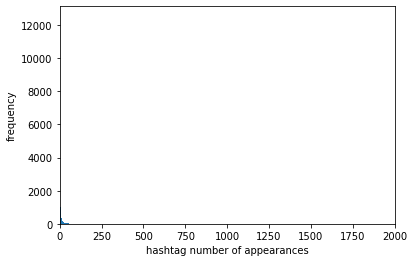

In [411]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
num_Bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
ax = plt.figure()
plt.hist(counts, bins = numBins)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.show()

## 3.7 Hashtag correlation
After having determined the popular hashtags we can create a correlation matrix to determine which hashtags appear most together. To do so we first create a dataframe that contains each tweet and the hashtags that are included in each Using this matrix representation we can then visualize our correlation matrix. As we cn see from our correlation matrix there are multiple pregnancy hashtags and these are strongly positively correlated with the hashtag #vaccineswork.

In [412]:
# take hashtags which appear at least 1000 times
min_appearance = 1000
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [413]:

# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [414]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [415]:
hashtag_vector_df.head()

,popular_hashtags,#Praybig,#VaxXed,#vaccine,#Autism,#vaccinescauseautism,#ThinkBabies,#VaccineInjury,#edu,#Vaccine,...,#VAXXED,#vaccines,#Vaxxed,#Vaccines,#ObGyn,#LearnTheRisk,#maternity,#vaxxed,#VaccinesKill,#Periscope
0,"[#Autism, #Vaccines, #LearnTheRisk, #VaccineIn...",0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,[#CDCwhistleblower],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[#vaccines, #Autism]",0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,"[#vaccinescauseautism, #VaccineInjury]",0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,"[#Autism, #LearnTheRisk, #VaccineInjury]",0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [416]:
# Drop popular_hashtags columns
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

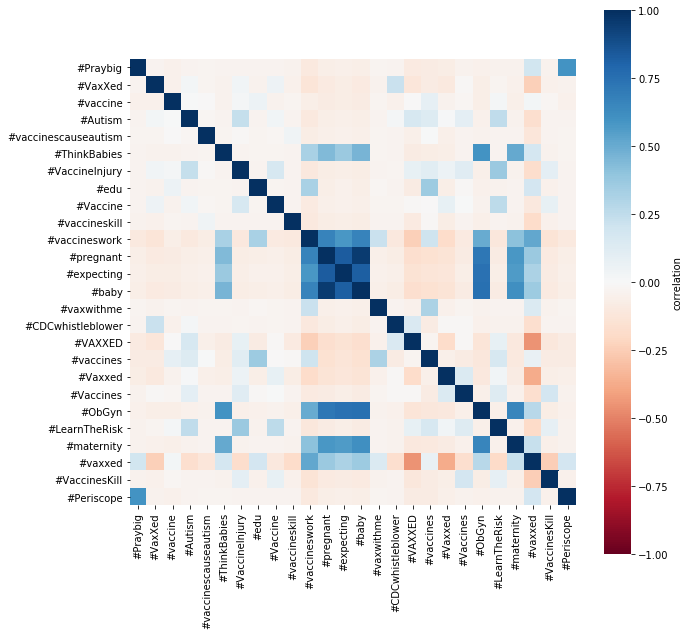

In [417]:
import seaborn as sns
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

## 3.8 Identifying top mentions
Tweets include mentions (@username) aside from hashtags. We therefore are alsop interested in these. To identify the top mentions we first identify the users that are mentioned in each tweet and then calculate the frequency of the number of times a particular user is mentioned. 

In [418]:
# take the rows from the hashtag columns where there are actually hashtags
mentioned_list_df = vaxxed_rt.loc[
                       vaxxed_rt.mentioned.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['mentioned']]

In [419]:
mentioned_list_df.head()

,mentioned
0,[@JohnLeguizamo]
4,"[@TheDailyShow, @RepAdamSchiff, @ObamaFoundati..."
5,[@realDonaldTrump]
6,[@NYGovCuomo]
8,[@LouiseKistner]


In [420]:
# create dataframe where each use of hashtag gets its own row
flattened_mentioned_df = pd.DataFrame(
    [mentioned for mentioned_list in mentioned_list_df.mentioned
    for mentioned in mentioned_list],
    columns=['mentioned'])

In [421]:
# number of unique hashtags
flattened_mentioned_df['mentioned'].unique().size

9283

In [422]:
# count of appearances of each hashtag
popular_mentioned = flattened_mentioned_df.groupby('mentioned').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

The following are the top accounts that are mentioned, among them the president of the United States, Donald Trump.

In [423]:
popular_mentioned.head(20)

,mentioned,counts
0,@AutismMedia,1469
1,@realDonaldTrump,1190
2,@doritmi,964
3,@delbigtree,938
4,@EmmaGPaley,845
5,@Plasticdoe,784
6,@POTUS,751
7,@kidoctr,729
8,@YouTube,681
9,@StopVaxxedLies,605


## 3.9 Trying different LDA models
We have a base model that we used in section 6 however we decided to try different libraries and see if there are other methods to perform topic modeling.

## Model 1 using gensim and spacy libraries

In [443]:
#import necessary libraries
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

In [444]:
def give_emoji_free_text(text):
    """
    Removes emojis from tweets
    """
    emoji_list = [c for c in text if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

def url_free_text(text):
    '''
    Cleans text from urls
    '''
    text = re.sub(r'http\S+', '', text)
    return text

In [445]:

# Apply the function above and get tweets free of emoji's
call_emoji_free = lambda x: give_emoji_free_text(x)

# Apply `call_emoji_free` which calls the function to remove all emoji's
all_data_rt['emoji_free_tweets'] = all_data_rt['text'].apply(call_emoji_free)

#Create a new column with url free tweets
all_data_rt['url_free_tweets'] = all_data_rt['emoji_free_tweets'].apply(url_free_text)

In [446]:
all_data_rt # data after first cleaning steps

,tweet_id,name,screen_name,acctdesc,text,usercreated,created_at,favourite_count,retweet_count,hashtags,status_count,followers_count,following_count,location,source_device,is_retweet,mentioned,emoji_free_tweets,url_free_tweets
0,1252591941491007488,LotusOak,LotusOak2,"❦ God, please give me the grace to accept the ...",#HearThisWell: 250+ Parents of Kids with #Auti...,2011-11-30 01:40:51,2020-04-21 13:36:05,75.0,65.0,"[#HearThisWell, #Autism, #Vaccines, #LearnTheR...",94097,43621.0,38621.0,NaN,Vaccines and Homeopathy News,False,[],#HearThisWell: 250+ Parents of Kids with #Auti...,#HearThisWell: 250+ Parents of Kids with #Auti...
1,1248383421765697542,aspiesmom,aspiesmom,Fighting for disabled adult son's health/human...,"@HillaryClinton You also say ""vaccines work""\n...",2011-07-24 19:37:58,2020-04-09 22:52:56,10.0,5.0,"[#AutismAwarenessApril2020, #HearThisWell, #Va...",303300,7656.0,7701.0,NaN,Twitter Web App,False,[@HillaryClinton],"@HillaryClinton You also say ""vaccines work"" #...","@HillaryClinton You also say ""vaccines work"" #..."
2,1252117253073645569,aspiesmom,aspiesmom,Fighting for disabled adult son's health/human...,@NBCNews #AutismAwarenessApril2020 #VaccinesCa...,2011-07-24 19:37:58,2020-04-20 06:09:51,1.0,1.0,"[#AutismAwarenessApril2020, #VaccinesCauseAuti...",303300,7656.0,7701.0,NaN,Twitter Web App,False,"[@NBCNews, @congbillposey]",@NBCNews #AutismAwarenessApril2020 #VaccinesCa...,@NBCNews #AutismAwarenessApril2020 #VaccinesCa...
3,1246479132952858624,aspiesmom,aspiesmom,Fighting for disabled adult son's health/human...,@thomaskaine5 #AutismAwarenessApril2020&gt;#Va...,2011-07-24 19:37:58,2020-04-04 16:45:58,0.0,2.0,"[#AutismAwarenessApril2020, #VaccinesCauseAuti...",303300,7656.0,7701.0,NaN,Twitter Web App,False,[@thomaskaine5],@thomaskaine5 #AutismAwarenessApril2020&gt;#Va...,@thomaskaine5 #AutismAwarenessApril2020&gt;#Va...
4,1247842404205506560,LotusOak,LotusOak2,"❦ God, please give me the grace to accept the ...",A government medical expert - used to debunk l...,2011-11-30 01:40:51,2020-04-08 11:03:07,22.0,27.0,"[#vaccines, #Autism, #Zimmerman, #VaccinesCaus...",94097,43621.0,38621.0,NaN,Vaccines and Homeopathy News,False,[@SharylAttkisson],A government medical expert - used to debunk l...,A government medical expert - used to debunk l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43036,959917078449881088,Jon Rappoport,jonrappoport,Investigative reporter for over 30 years. http...,#Vaxxed: CDC caught pimping toxic flu vaccines...,2010-03-17 20:54:50,2018-02-03 22:30:40,105.0,119.0,"[#Vaxxed, #PatriotChallenge]",4748,48428.0,11415.0,NaN,Twitter Web Client,False,[],#Vaxxed: CDC caught pimping toxic flu vaccines...,#Vaxxed: CDC caught pimping toxic flu vaccines...
43037,959544111438155781,Silver Babe,yarrs,Reiki Master Teacher & @ArcadiaEconomic Market...,@BeckyJohnson222 For the sake of our kids we h...,2008-11-01 15:56:52,2018-02-02 21:48:38,0.0,0.0,"[#VAXXED, #vaccine, #LotusOak]",17478,1516.0,1260.0,NaN,Convey: Make it post for you,False,"[@BeckyJohnson222, @c0nvey]",@BeckyJohnson222 For the sake of our kids we h...,@BeckyJohnson222 For the sake of our kids we h...
43038,959009924280913920,Sallie O. Elkordy,VaccineFreeNYC,Blog: https://t.co/pt1eMTCloW\nBlogtalkradio:...,"Vaccines during Pregnancy? ""NO""!!! https://t....",2015-01-08 02:56:58,2018-02-01 10:25:58,0.0,4.0,"[#RFKCommission, #JusticeOrElse, #MAGA, #OUTLA...",2102,856.0,324.0,NaN,Twitter Web Client,False,"[@BenSwann_, @SharylAttkisson, @ThisMomHCN, @M...","Vaccines during Pregnancy? ""NO""!!! https://t.c...","Vaccines during Pregnancy? ""NO""!!! ~ #RFKComm..."
43039,958954626346311680,Ana Morcodeanu,AnaMmorcodeanu,licensed New York State Professional.,I am a doctor and I now know the truth about v...,2016-02-12 19:57:42,2018-02-01 06:46:14,0.0,0.0,"[#vaxxed, #DidYouKno]",85,9.0,38.0,NaN,Twitter Web Client,False,[@YouTube],I am a doctor and I now know the truth about v...,I am a doctor and I now know the t

In [449]:
#necessary libraries for natural langauge processing
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

In [475]:
import en_core_web_lg

In [476]:
nlp = en_core_web_lg.load()

In [477]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

Before running our model we clean the data from stopwords, and we tokenize our tweets in hopes up getting a better model as a result.

In [479]:
# Custom stopwords
custom_stopwords = ['\n','\n\n', '&amp;', ' ', '.', '-', '$', '@']
# Customize stop words by adding to the default list
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)

# ALL_STOP_WORDS = spacy + gensim + wordcloud
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)

In [481]:
tokens = []

for doc in tokenizer.pipe(all_data_rt['url_free_tweets'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

In [482]:
# Makes tokens column
all_data_rt['tokens'] = tokens

In [485]:
# Make tokens a string again
all_data_rt['tokens_back_to_text'] = [' '.join(map(str, l)) for l in all_data_rt['tokens']]

def get_lemmas(text):
    '''Used to lemmatize the processed tweets'''
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [486]:
all_data_rt['lemmas'] = all_data_rt['tokens_back_to_text'].apply(get_lemmas)

In [487]:
# Make lemmas a string again
all_data_rt['lemmas_back_to_text'] = [' '.join(map(str, l)) for l in all_data_rt['lemmas']]

In [488]:
# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    tokens = re.sub('@*!*\$*', '', text) # Remove @ ! $
    tokens = tokens.strip(',') # TESTING THIS LINE
    tokens = tokens.strip('?') # TESTING THIS LINE
    tokens = tokens.strip('!') # TESTING THIS LINE
    tokens = tokens.strip("'") # TESTING THIS LINE
    tokens = tokens.strip(".") # TESTING THIS LINE

    tokens = tokens.lower().split() # Make text lowercase and split it
    
    return tokens

In [489]:
# Apply tokenizer
all_data_rt['lemma_tokens'] = all_data_rt['lemmas_back_to_text'].apply(tokenize)

In [491]:
# Create a id2word dictionary
id2word = Dictionary(all_data_rt['lemma_tokens'])
print(len(id2word))

41782


In [492]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))

19055


In [493]:
# corpus including our tokenized data 
corpus = [id2word.doc2bow(d) for d in all_data_rt['lemma_tokens']]

In [495]:
# base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)

In [496]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

In [497]:
# Create Topics
topics = [' '.join(t[0:10]) for t in words]

In [498]:
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
vaxxed vaccine praybig hpv vaccineswork autismmedia periscope edu child hpvvaccine

------ Topic 1 ------
vaxxed vaccine doritmi emmagpaley plasticdoe autism kidoctr just4thecause vbalance03 child

------ Topic 2 ------
vaxxed vaccine vaccineswork baby pregnant autism expect obgyn cdc maternity

------ Topic 3 ------
vaxxed vaccine vaccineswork child truth flu baby know vaxwithme pregnant

------ Topic 4 ------
vaxxed vaccine vaccineskill autism bigpharma child realdonaldtrump informedconsent study vaccinescauseautism



## Model 2 using sklearn
We try a different model using sklearn and the LatentDirchletAllocation that is part of that library.

In [508]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [513]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub(r'(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [528]:
def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

In [529]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub(r'['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub(r'\s+', ' ', tweet) #remove double spacing
    tweet = re.sub(r'([0-9]+)', '', tweet) # remove numbers
    tweet = strip_all_entities(tweet)
    
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [533]:
all_data_rt['clean_tweet'] = all_data_rt.text.apply(clean_tweet)

In [534]:
all_data_rt

,tweet_id,name,screen_name,acctdesc,text,usercreated,created_at,favourite_count,retweet_count,hashtags,...,is_retweet,mentioned,emoji_free_tweets,url_free_tweets,tokens,tokens_back_to_text,lemmas,lemmas_back_to_text,lemma_tokens,clean_tweet
0,1252591941491007488,LotusOak,LotusOak2,"❦ God, please give me the grace to accept the ...",#HearThisWell: 250+ Parents of Kids with #Auti...,2011-11-30 01:40:51,2020-04-21 13:36:05,75.0,65.0,"[#HearThisWell, #Autism, #Vaccines, #LearnTheR...",...,False,[],#HearThisWell: 250+ Parents of Kids with #Auti...,#HearThisWell: 250+ Parents of Kids with #Auti...,"[#hearthiswell:, 250+, parents, kids, #autism,...",#hearthiswell: 250+ parents kids #autism givin...,"[hearthiswell, 250, +, parent, kid, autism, gi...",hearthiswell 250 + parent kid autism give test...,"[hearthiswell, 250, +, parent, kid, autism, gi...",parent kid give testimoni
1,1248383421765697542,aspiesmom,aspiesmom,Fighting for disabled adult son's health/human...,"@HillaryClinton You also say ""vaccines work""\n...",2011-07-24 19:37:58,2020-04-09 22:52:56,10.0,5.0,"[#AutismAwarenessApril2020, #HearThisWell, #Va...",...,False,[@HillaryClinton],"@HillaryClinton You also say ""vaccines work"" #...","@HillaryClinton You also say ""vaccines work"" #...","[@hillaryclinton, ""vaccines, work"", #autismawa...","@hillaryclinton ""vaccines work"" #autismawarene...","[@hillaryclinton, vaccine, work, autismawarene...",@hillaryclinton vaccine work autismawarenessap...,"[hillaryclinton, vaccine, work, autismawarenes...",also say vaccin work
2,1252117253073645569,aspiesmom,aspiesmom,Fighting for disabled adult son's health/human...,@NBCNews #AutismAwarenessApril2020 #VaccinesCa...,2011-07-24 19:37:58,2020-04-20 06:09:51,1.0,1.0,"[#AutismAwarenessApril2020, #VaccinesCauseAuti...",...,False,"[@NBCNews, @congbillposey]",@NBCNews #AutismAwarenessApril2020 #VaccinesCa...,@NBCNews #AutismAwarenessApril2020 #VaccinesCa...,"[@nbcnews, #autismawarenessapril2020, #vaccine...",@nbcnews #autismawarenessapril2020 #vaccinesca...,"[@nbcnews, autismawarenessapril2020, vaccinesc...",@nbcnews autismawarenessapril2020 vaccinescaus...,"[nbcnews, autismawarenessapril2020, vaccinesca...",disclos decept
3,1246479132952858624,aspiesmom,aspiesmom,Fighting for disabled adult son's health/human...,@thomaskaine5 #AutismAwarenessApril2020&gt;#Va...,2011-07-24 19:37:58,2020-04-04 16:45:58,0.0,2.0,"[#AutismAwarenessApril2020, #VaccinesCauseAuti...",...,False,[@thomaskaine5],@thomaskaine5 #AutismAwarenessApril2020&gt;#Va...,@thomaskaine5 #AutismAwarenessApril2020&gt;#Va...,"[@thomaskaine5, #autismawarenessapril2020&gt;#...",@thomaskaine5 #autismawarenessapril2020&gt;#va...,"[@thomaskaine5, autismawarenessapril2020&gt;#v...",@thomaskaine5 autismawarenessapril2020&gt;#vac...,"[thomaskaine5, autismawarenessapril2020&gt;#va...",gt gt bought msm gt
4,1247842404205506560,LotusOak,LotusOak2,"❦ God, please give me the grace to accept the ...",A government medical expert - used to debunk l...,2011-11-30 01:40:51,2020-04-08 11:03:07,22.0,27.0,"[#vaccines, #Autism, #Zimmerman, #VaccinesCaus...",...,False,[@SharylAttkisson],A government medical expert - used to debunk l...,A government medical expert - used to debunk l...,"[government, medical, expert, debunk, links, #...",government medical expert debunk links #vaccin...,"[government, medical, expert, debunk, link, va...",government medical expert debunk link vaccine ...,"[government, medical, expert, debunk, link, va...",govern medic expert use debunk link made stun ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43036,959917078449881088,Jon Rappoport,jonrappoport,Investigative reporter for over 30 years. http...,#Vaxxed: CDC caught pimping toxic flu vaccines...,2010-03-17 20:54:50,2018-02-03 22:30:40,105.0,119.0,"[#Vaxxed, #PatriotChallenge]",...,False,[],#Vaxxed: CDC caught pimping toxic flu vaccines...,#Vaxxed: CDC caught pimping toxic flu vaccines...,"[#vaxxed:, cdc, caught, pimping, toxic, 

In [536]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern=r'\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(all_data_rt['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [537]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)


In [538]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [539]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)


In [540]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,get,1505.3,pharma,1276.2,vaccin,2594.7,vaccin,2785.1,vaccin,6579.8,vaccin,2492.1,vaccin,1935.9,watch,1382.1,amp,879.5,vaccin,2223.0
1,peopl,1415.1,vaccin,1095.9,flu,1565.7,injuri,1365.5,measl,1207.0,’,1602.0,safeti,537.0,gt,881.6,stori,794.9,dr,696.3
2,’t,1208.0,amp,758.2,truth,1090.2,year,1048.7,safeti,918.7,doctor,746.3,cdc,523.4,amp,867.8,watch,671.9,children,642.0
3,vaccin,1014.6,big,748.2,shot,923.2,death,942.7,cdc,803.2,time,547.4,autism,473.8,pleas,704.5,see,602.6,son,606.8
4,one,1001.2,need,726.8,know,886.5,die,939.1,diseas,606.1,injur,516.8,dr,408.9,stori,619.1,autism,559.8,vx,585.8
5,like,861.4,autism,636.2,studi,650.4,babi,846.0,anti,581.1,children,509.8,watch,400.1,vax,595.3,vax,499.3,effect,582.4
6,amp,848.8,children,633.9,doctor,500.9,old,732.1,children,565.3,cannot,495.0,video,392.0,free,532.7,must,404.7,autism,497.6
7,make,783.5,studi,625.6,anti,465.2,caus,664.7,caus,556.9,immun,452.5,health,384.9,read,513.5,vaccin,364.9,kid,478.1
8,go,775.8,parent,540.7,thank,463.8,injur,631.0,hpv,545.9,sue,410.1,bill,376.8,movi,402.1,pleas,329.2,health,478.1
9,know,738.6,research,432.2,via,447.0,autism,554.9,–,526.2,exempt,408.6,amp,368.6,full,366.7,care,316.9,amp,468.4


In [585]:
vectorizer = CountVectorizer(
analyzer='word',       
min_df=3,# minimum required occurences of a word 
stop_words='english',# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
max_features=5000,# max number of unique words
                            )
data_matrix = vectorizer.fit_transform(all_data_rt.clean_tweet)
data_matrix

<43041x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 358242 stored elements in Compressed Sparse Row format>

In [580]:
lda_model = LatentDirichletAllocation(
n_components=10, # Number of topics
learning_method='online',
random_state=20)
                                     
lda_output = lda_model.fit_transform(data_matrix)

In [ ]:
# visualizing our topics 
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer
                        )
#pyLDAvis.sklearn.prepare(lda_tf, dtm_tf_autism, tf_vectorizer)

In [582]:
# printing top topcis
for i,topic in enumerate(lda_model.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['vaccin', 'good', 'need', 'children', 'make', 'parent', 'child', 'vax', 'kid', 'amp']


Top 10 words for topic #1:
['hear', 'mom', 'exempt', 'happen', 'forc', 'ask', 'mandatori', 'old', 'vaccin', 'flu']


Top 10 words for topic #2:
['drug', 'mercuri', 'aluminum', 'chang', 'human', 'inject', 'look', 'cancer', 'vaccin', 'babi']


Top 10 words for topic #3:
['die', 'mani', 'studi', 'anti', 'new', 'caus', 'cdc', 'safeti', 'autism', 'vaccin']


Top 10 words for topic #4:
['harm', 'vaccin', 'real', 'free', 'cdc', 'big', 'scienc', 'shot', 'pleas', 'pharma']


Top 10 words for topic #5:
['safe', 'famili', 'effect', 'immun', 'research', 'time', 'truth', 'know', 'doctor', 'vaccin']


Top 10 words for topic #6:
['fact', 'right', 'tell', 'say', 'health', 'thank', 'children', 'measl', 'injur', 'vaccin']


Top 10 words for topic #7:
['cover', 'trust', 'follow', 'govern', 'documentari', 'use', 'link', 'report', 'medic', 'watch']


Top 10 words for topic #8:
['creat', 'prov

# 4. Creating graphical representation of tweet frequency

Although we were able to see the number of absolute tweets, since we have tweets that go from September 2017 to August 2019, spanning effectively three years. Therefore, we are also interested in how the number of tweets developed over the years. 

## 4.1 Create functions to count and plot number of tweets per month

In the following the functions dateCount() and datePlot() are detailed, they allow for an easy way to visualize all of the data over time.

In [232]:
# import necessary library
from datetime import datetime

In [233]:
def dateCount(data):
    """
    creates a and returns a dictionary with the counts of tweets within a particular dataset 
    appeared in each month of a year
    """
    for i in range(len(data['created_at'])):
        # check if there is wierd values in our created_at column
        if  (type(data['created_at'][i]) is not datetime) and (type(data['created_at'][i]) != float)  :
            try: 
                data['created_at'][i] = datetime.strptime(data['created_at'][i],'%Y-%m-%d %H:%M:%S')
            except (ValueError, TypeError, NameError):
                pass # if yes just skip row

    dateTup = []
    for i in range(len(data)):
        if (type(data['created_at'][i]) == float) or (type(data['created_at'][i]) == str) : # if NaN then break
            continue # if value is nonsensical skip
        tup = data['created_at'][i].month, data['created_at'][i].year
        dateTup.append(tup)
        
    sortedDates = sorted(dateTup, key=lambda element: (element[1], element[0]))
    
    counter = collections.OrderedDict() # create 
    for date in sortedDates: 
        counter[date]=counter.get(date, 0)+1
    return counter


In [234]:
counts = dateCount(vaccines_poison_2017)
counts # example of the number of tweets in hashtag #vaccinesarepoison from Sept. 2017 to Aug. 2018

OrderedDict([((9, 2017), 4),
             ((10, 2017), 1),
             ((11, 2017), 1),
             ((12, 2017), 1),
             ((1, 2018), 4),
             ((2, 2018), 1),
             ((4, 2018), 2),
             ((5, 2018), 1),
             ((6, 2018), 4),
             ((7, 2018), 2),
             ((8, 2018), 18)])

In [235]:
def datePlot(dateCounts, name, num=True):
    """
    visualizes the frequency of tweets for each month from a particular dataset
    """
    # x axis: one point per unique tuple
    x=range(len(dateCounts))
    # y axis: count for each tuple, sorted by tuple value
    y=[dateCounts[key] for key in dateCounts]
    if num:
        # labels for x axis: tuple as strings
        xlabels=[str(time) for time in dateCounts]
    else:
        counter = 0
        xlabels=[]
        for time in dateCounts:
            if counter%3 == 0:
                xlabels.append(str(time))
            counter= counter +1
    # plot
    plt.figure(figsize=(15,6))
    plt.bar(x,y,width=1)
    # set the labels at the middle of the bars
    if num:
        plt.xticks([x for x in x],xlabels)
    else:
        plt.xticks([p for p in range(0,len(dateCounts),3)],xlabels)
    plt.xlabel('month and year', fontsize=16)
    plt.ylabel('number of tweets', fontsize=16)
    plt.suptitle('Tweet Frequency over the months '+name, fontsize=18)


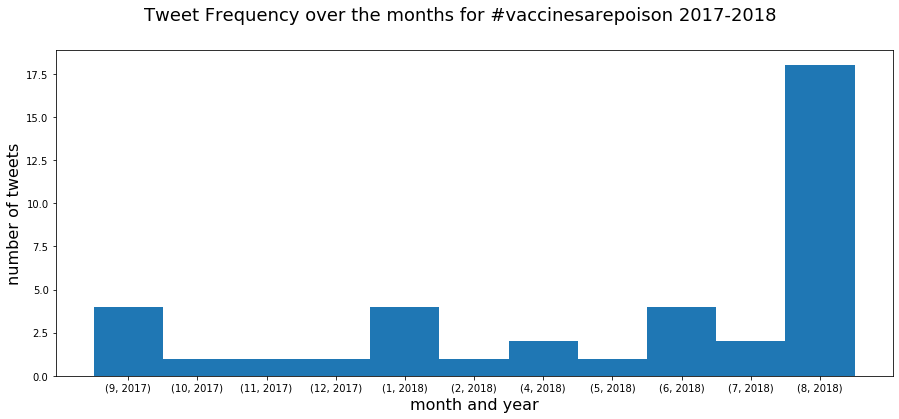

In [236]:
datePlot(counts, "for #vaccinesarepoison 2017-2018") # plot for #vaccinesarepoison 2017-2018

## 4.2 Visualizing data over time
For each of the above datasets we will look at the number of tweets over time:

### 4.2.1 Visualizing data from #vaccinescauseautism

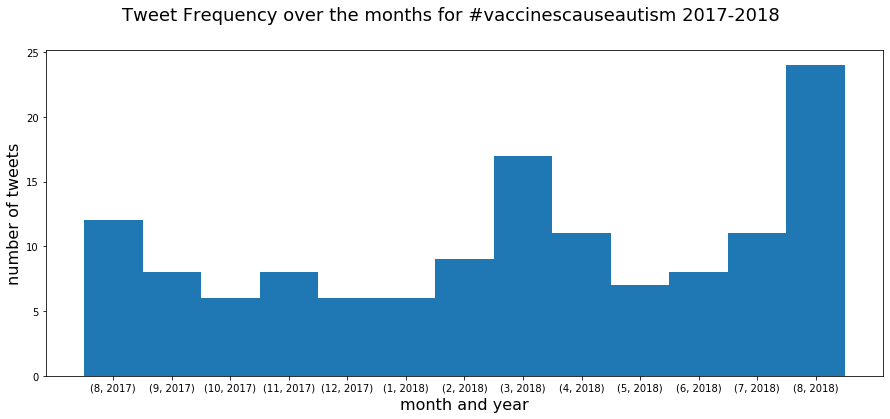

In [237]:
autism2017Count = dateCount(autism_data_2017)
datePlot(autism2017Count, "for #vaccinescauseautism 2017-2018")

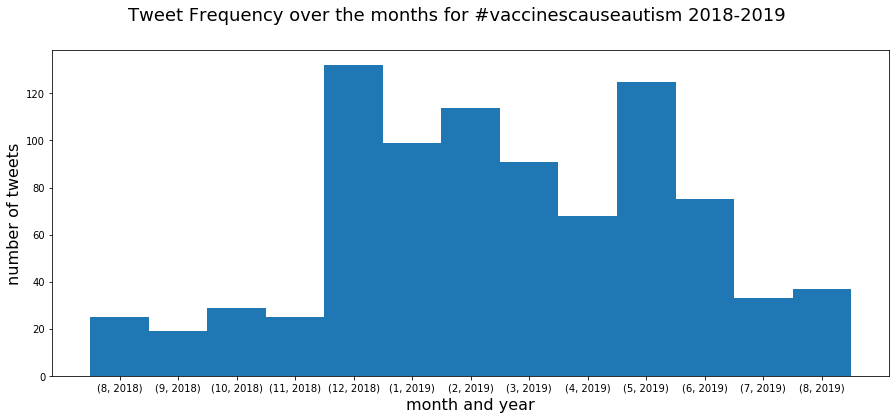

In [238]:
autism2018Count = dateCount(autism_data_2018)
datePlot(autism2018Count, "for #vaccinescauseautism 2018-2019")

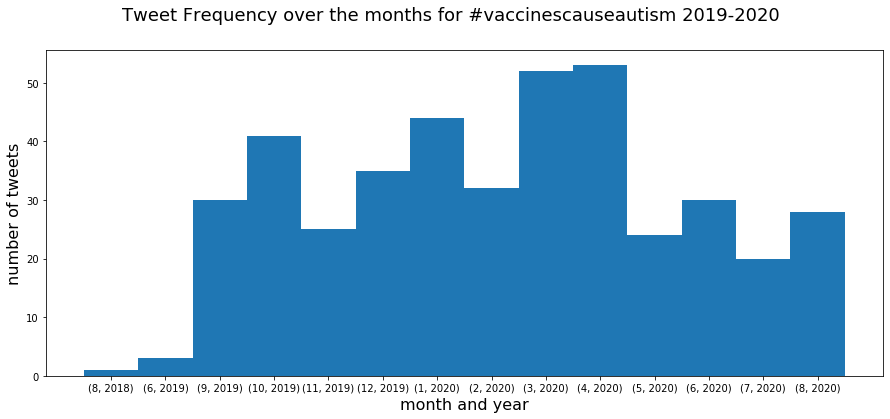

In [239]:
autism2019Count = dateCount(autism_data_historical)
datePlot(autism2019Count, "for #vaccinescauseautism 2019-2020")

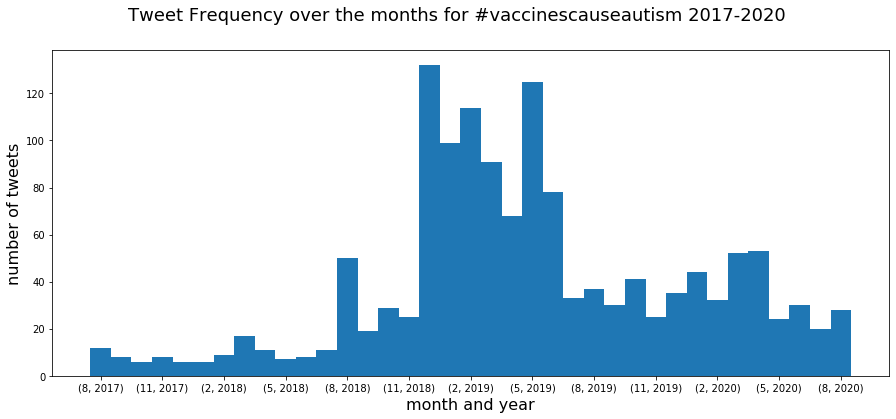

In [240]:
autismCountAll = dateCount(autism_all)
datePlot(autismCountAll, "for #vaccinescauseautism 2017-2020", num=False)

### 4.2.2 Visualizing data from #vaccineskill

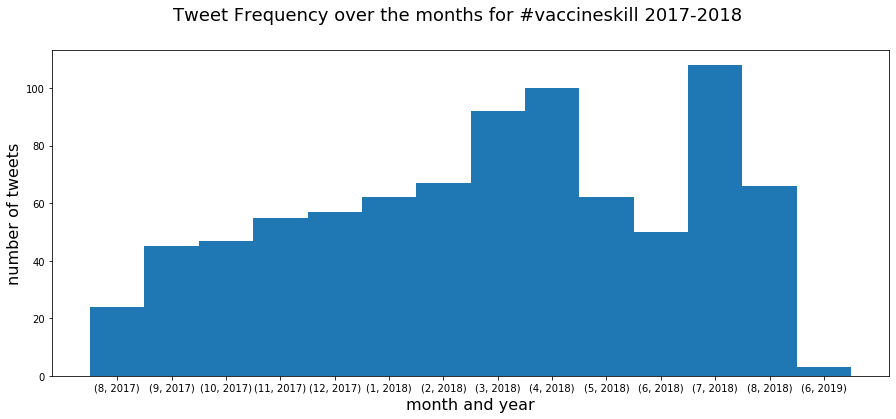

In [241]:
vaccines2017Count = dateCount(vaccines_kill_2017)
datePlot(vaccines2017Count, "for #vaccineskill 2017-2018")

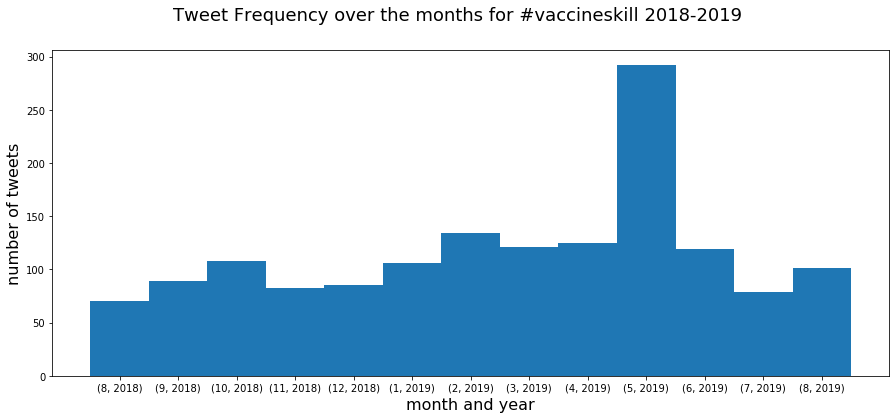

In [242]:
vaccines2018Count = dateCount(vaccines_kill_2018)
datePlot(vaccines2018Count, "for #vaccineskill 2018-2019")

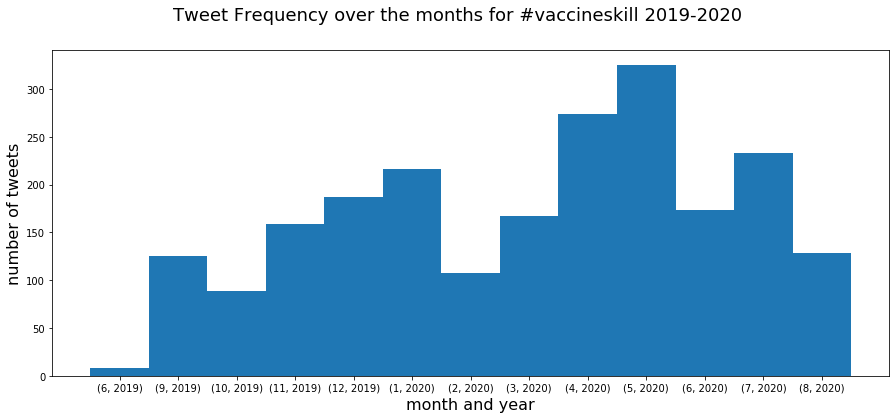

In [243]:
vaccines2019Count = dateCount(vaccines_kill_historical)
datePlot(vaccines2019Count, "for #vaccineskill 2019-2020")

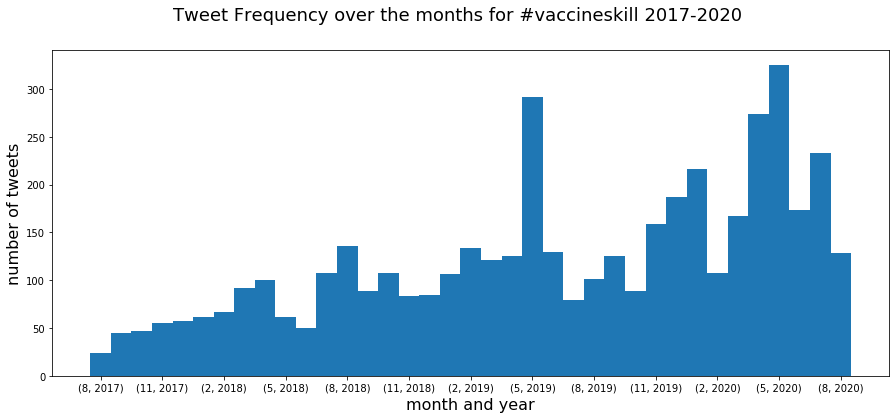

In [244]:
vaccinesKillCount = dateCount(kill_all)
datePlot(vaccinesKillCount, "for #vaccineskill 2017-2020", num = False)

### 4.2.3 Visualizing data from #vaccinesarepoison

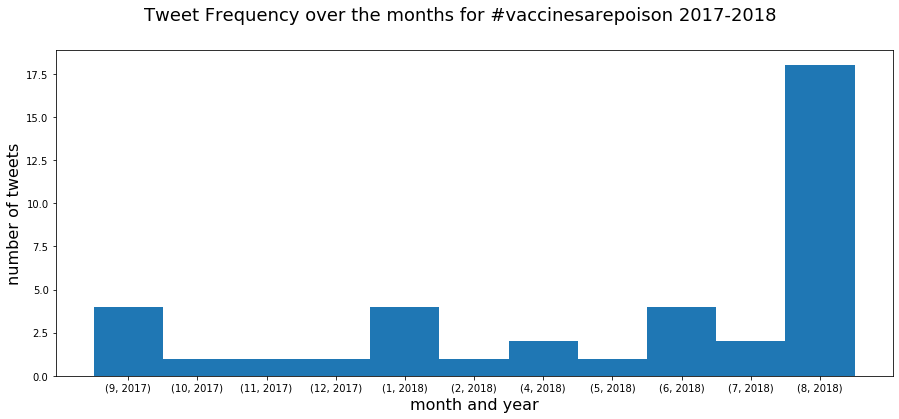

In [245]:
poison2017Count = dateCount(vaccines_poison_2017)
datePlot(poison2017Count, "for #vaccinesarepoison 2017-2018")

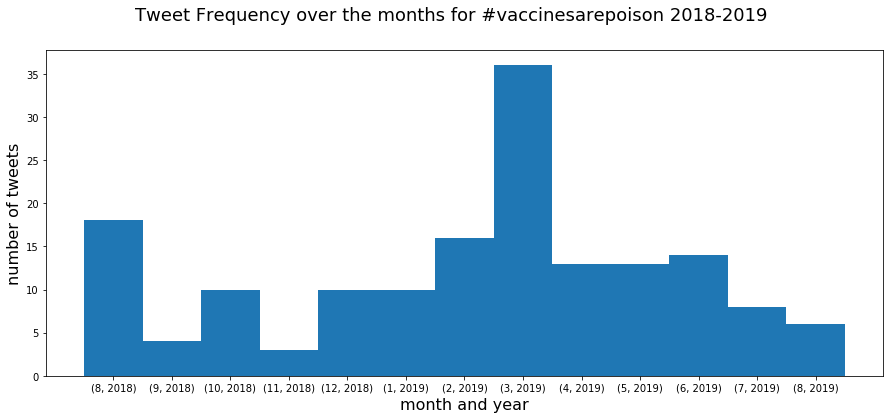

In [246]:
poison2018Count = dateCount(vaccines_poison_2018)
datePlot(poison2018Count, "for #vaccinesarepoison 2018-2019")

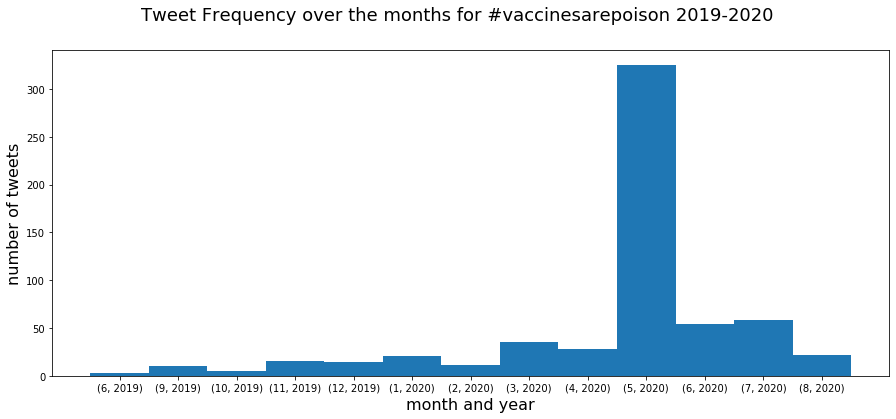

In [247]:
poison2019Count = dateCount(vaccines_poison_historical)
datePlot(poison2019Count, "for #vaccinesarepoison 2019-2020")

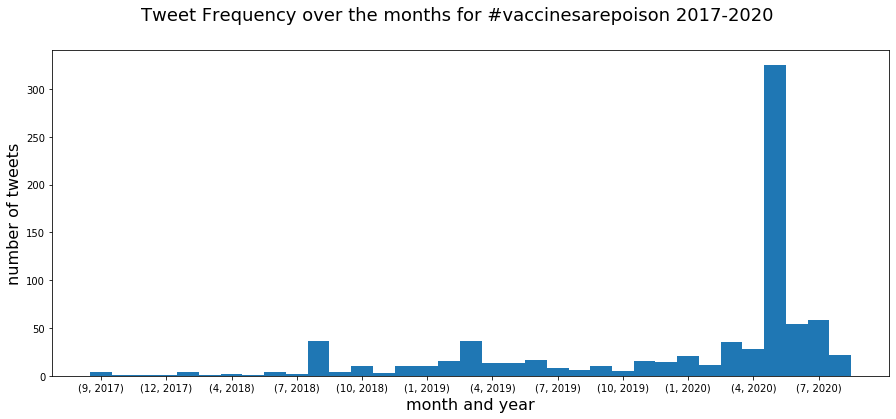

In [248]:
poisonCountAll = dateCount(poison_all)
datePlot(poisonCountAll , "for #vaccinesarepoison 2017-2020", num=False)

### 4.2.4 Visualizing data from #vaccineinjured

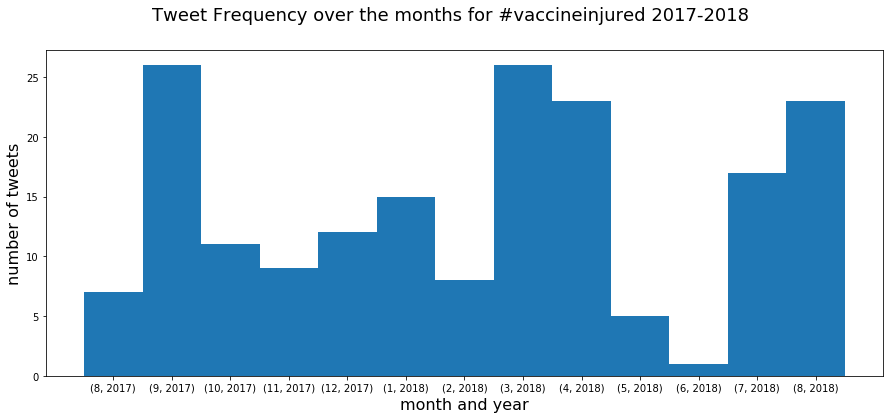

In [249]:
injured2017Count = dateCount(vaccine_injured_2017)
datePlot(injured2017Count, "for #vaccineinjured 2017-2018")

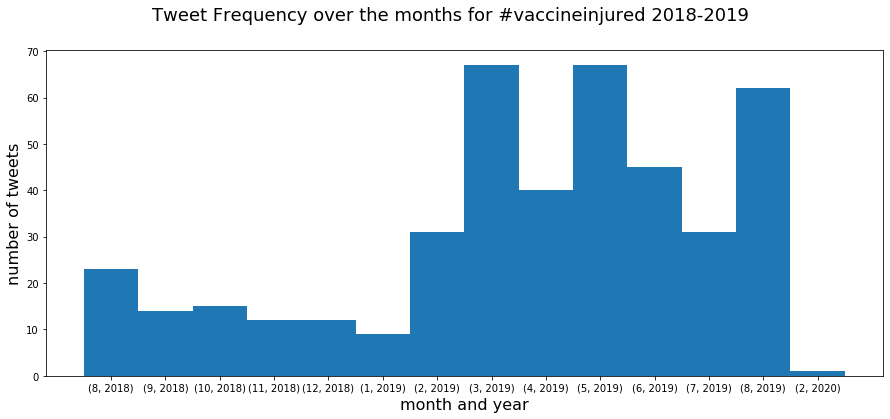

In [250]:
injured2018Count = dateCount(vaccine_injured_2018)
datePlot(injured2018Count, "for #vaccineinjured 2018-2019")

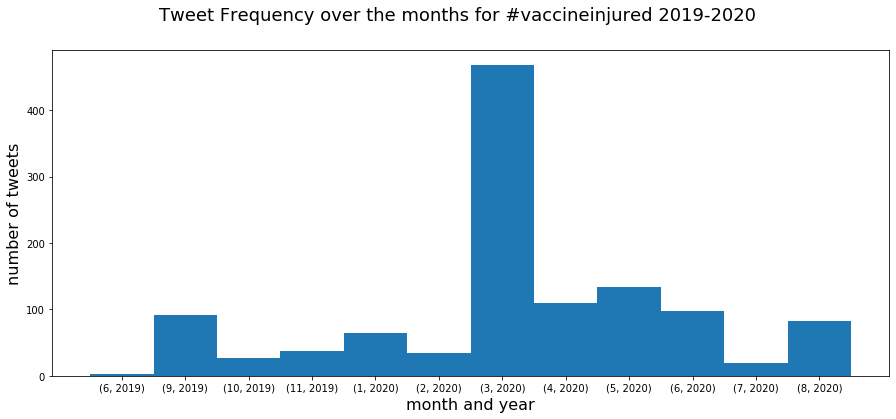

In [251]:
injured2019Count = dateCount(vaccine_injured_historical)
datePlot(injured2019Count, "for #vaccineinjured 2019-2020")

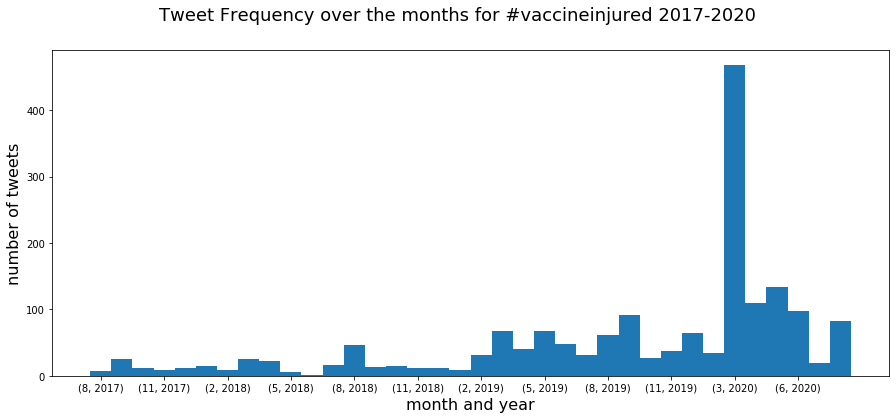

In [252]:
injuredCountAll = dateCount(injured_all)
datePlot(injuredCountAll, "for #vaccineinjured 2017-2020", num = False)

### 4.2.5 Visualizing data from #vaxxed

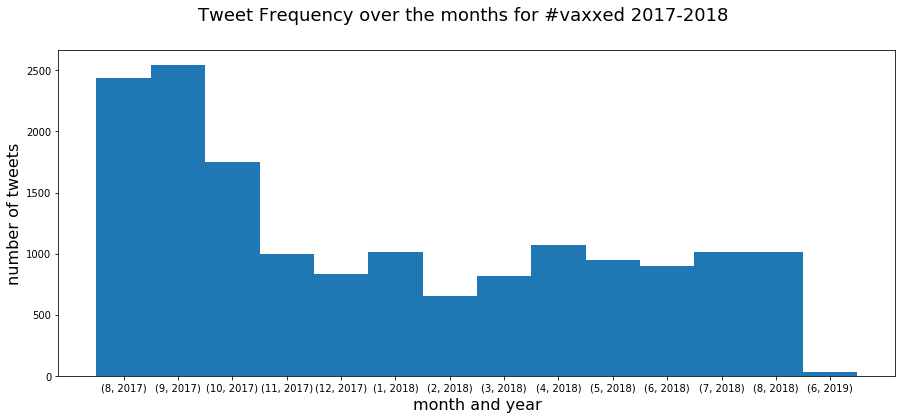

In [253]:
vaxxed2017Count = dateCount(vaxxed_2017)
datePlot(vaxxed2017Count, "for #vaxxed 2017-2018")

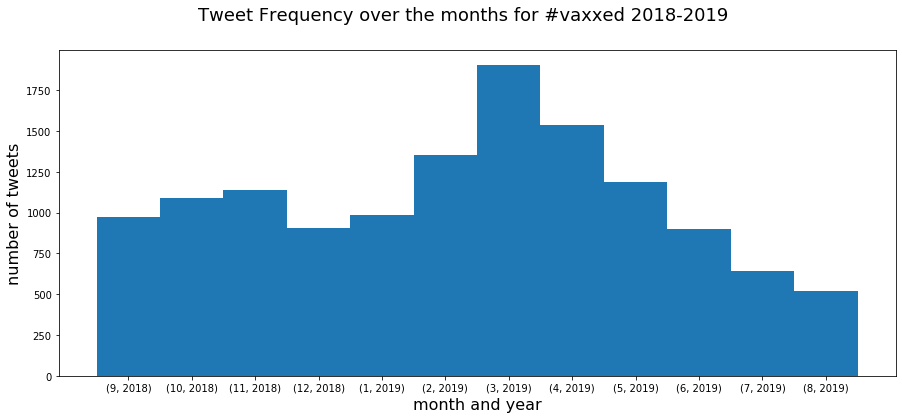

In [254]:
vaxxed2018Count = dateCount(vaxxed_2018)
datePlot(vaxxed2018Count, "for #vaxxed 2018-2019")

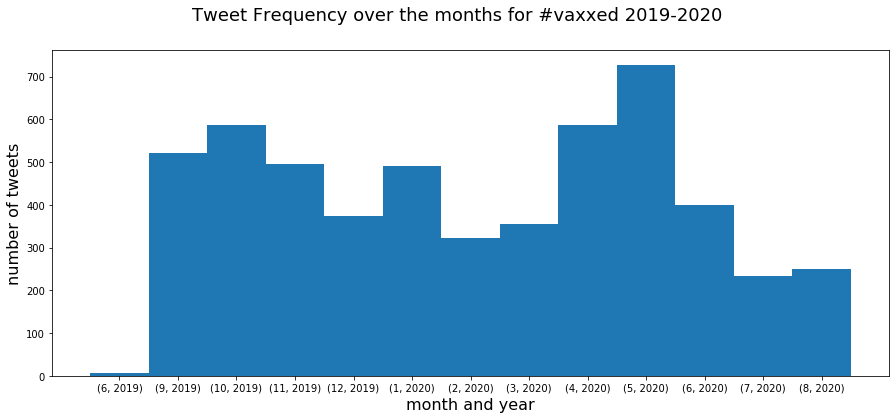

In [255]:
vaxxed2019Count = dateCount(vaxxed_historical)
datePlot(vaxxed2019Count, "for #vaxxed 2019-2020")

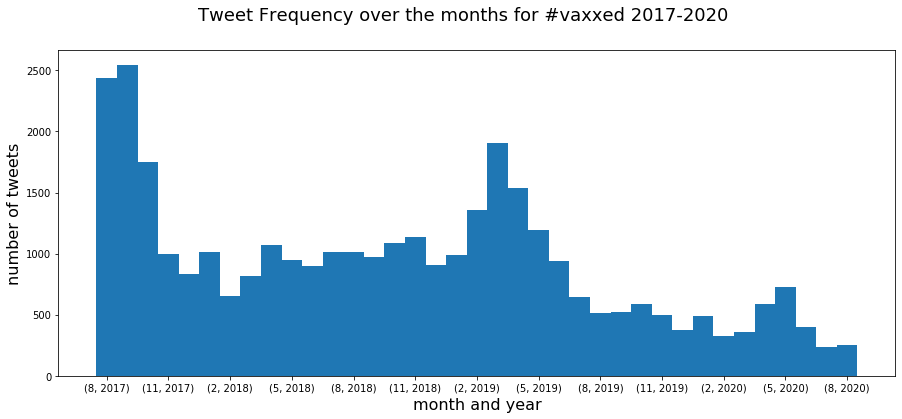

In [256]:
vaxxed_allCount = dateCount(vaxxed_all)
datePlot(vaxxed_allCount, "for #vaxxed 2017-2020", num=False)

### 4.2.5 Visualizing data from all hashtags

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


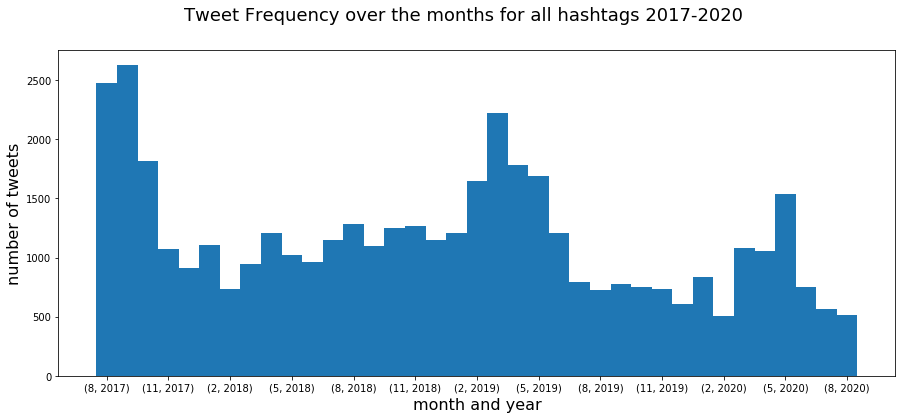

In [257]:
allCounts = dateCount(all_data)
datePlot(allCounts, "for all hashtags 2017-2020", num=False)

# 5. Identifying top terms being used throughout

After having looked at the number of tweets over time, we are also interested in the content of the tweets. Therefore we want to examine the words contained in each tweet to look for common patterns. 

## 5.1 Writing code to clean tweets

### 5.1.1 Removing URLs and other symbols

In [186]:
# import necessary libraries for cleaning and analysis 
import nltk
from nltk.corpus import stopwords
import re
import networkx

In [536]:
def clean_tweet(tweet):
    """removes any urls found in text as well as mentions and # symbols, 
    if hashtag is false then the whol hashtag is removed, otherwise just # symbol
    """
    tweet = " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    punctuations = '''!()-![]{};:+'"\,<>./?@#$%^&*_~'''
    tweet = ''.join([i for i in tweet if not i in punctuations])
    return tweet

In [537]:
def tweets_no_urls(dataset):
    all_tweets_no_urls = [clean_tweet(tweet) for tweet in dataset["text"]]
    return all_tweets_no_urls

In [538]:
t1 = tweets_no_urls(autism_all)[0] # cleans our tweets and removes urls 
t1

'HearThisWell 250 Parents of Kids with Autism Giving Their Testimonies about Vaccines LearnTheRisk VaccineInjury ASD VaccinesCauseAutism InformedConsent HumanRights'

In [539]:
autism_all['text'][0] # before removing urls 

'#HearThisWell: 250+ Parents of Kids with #Autism Giving Their Testimonies about #Vaccines\n\nhttps://t.co/PcPrirjmzz\n\n#LearnTheRisk #VaccineInjury #ASD #VaccinesCauseAutism #InformedConsent #HumanRights https://t.co/CrTCpcTPro'

### 5.1.2 Pulling words apart
After having removed the @,# and other symbols as well as URLs, we see that many hashtags are used as words in a sentence. Therefore removing the hashtag altogether would detract from the overall meaning of the tweet. To counteract this, we use the Python library wordsegment which pulls the words in a hashtag apart to create multiple words.

In [188]:
# importing necessary library
from wordsegment import load, segment
load()

In [518]:
t1 = ' '.join(segment(t1))
print(t1) # example of how segmenting pulls aport the hashtag, original tweet seen a few lines above

hear this well 250 parents of kids with autism giving their testimonies about vaccines learn the risk vaccine injury as d vaccines cause autism informed consent human rights


In [522]:
def pullApartHashtags(tweets):
    """
    takes each tweet and pulls apart any words that were mistakenly joined together
    """
    tweets = [' '.join(segment(t)) for t in tweets]
    return tweets

In [521]:
pullApartHashtags(tweets_no_urls(autism_all)[:5]) # example output of pulling tweets apart

['hear this well 250 parents of kids with autism giving their testimonies about vaccines learn the risk vaccine injury as d vaccines cause autism informed consent human rights',
 'hillary clinton you also say vaccines work autism awareness april 2020h earth is well vaccines cause autism autism pandemic',
 'nbc news autism awareness april 2020 vaccines cause autism cong bill posey cdc whistleblower discloses deception',
 'thomas kaine5 autism awareness april 2020gt vaccines cause autism never forget gt pharma bought msm hear this well gt breaking the silence on vaccine violence',
 'a government medical expert used to debunk links between vaccines and autism made a stunning turnabout admitted the links exist watch the report on full measure with sharyl att kiss on zimmerman vaccines cause autism']

### 5.1.3 Spelling correction 
Tweets, because they are written so quickly often contain spelling mistakes, therefore we use the Python library autocorrect to help remove any spelling errors.

In [185]:
from autocorrect import Speller # to correct spelling

In [531]:
# example of how autocorrect works 
spell = Speller(fast=True)
t1 = ' '.join([spell(w) for w in t1.split()])
print(t1) 

hear this well 250 parents of kids with autism giving their testimonies about vaccines learn the risk vaccine injury as d vaccines cause autism informed consent human rights


### 5.1.4 Combining preprocessing steps into one
As we have seen the preprocessing cycle includes multiple steps. Since we will be performing it multiple times it is useful to have one function that performs all of the steps outlined above in one. Therefore we define a function that meets this criteria.

In [183]:
def preprocessing(tweet):
    """
    cleans the tweets, removes spelling errors and other symbols
    """
    tweet = " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    punctuations = '''!()-![]{};:+'"\,<>./?@#$%^&*_~'''
    tweet = ''.join([i for i in tweet if not i in punctuations])
    tweet = ' '.join(segment(tweet)) # pull apart words that are together 
    #spell = Speller(fast=True) # create speller object to check spelling
    #tweet = ' '.join([spell(w) for w in tweet.split()])
    tweet = re.sub(r"\d", "", tweet) # get rid of digits
    tweet = tweet.lower() #lower all words
    return tweet

In [189]:
preprocessing(autism_all['text'][0]) # example of a preprocessed tweet text

'hear this well  parents of kids with autism giving their testimonies about vaccines learn the risk vaccine injury as d vaccines cause autism informed consent human rights'

## 5.2 Calculating word frequency
After having written the necessary functions to preprocess the tweets we can move on to counting the word frequency in the collected tweets.

In [262]:
autismCleaned = [preprocessing(t) for t in autism_all['text']]

In [263]:
words_in_tweet_autism = [tweet.split() for tweet in autismCleaned]

In [264]:
words_in_tweet_autism[:2]

[['hear',
  'this',
  'well',
  'parents',
  'of',
  'kids',
  'with',
  'autism',
  'giving',
  'their',
  'testimonies',
  'about',
  'vaccines',
  'learn',
  'the',
  'risk',
  'vaccine',
  'injury',
  'as',
  'd',
  'vaccines',
  'cause',
  'autism',
  'informed',
  'consent',
  'human',
  'rights'],
 ['hillary',
  'clinton',
  'you',
  'also',
  'say',
  'vaccines',
  'work',
  'autism',
  'awareness',
  'april',
  'h',
  'earth',
  'is',
  'well',
  'vaccines',
  'cause',
  'autism',
  'autism',
  'pandemic']]

In [192]:
nltk.download('stopwords') # import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andreamock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [265]:
def removeStopwords(words_in_tweet):
    """
    removes stopwords from our tweets
    """
    
    stop_words = set(stopwords.words('english')) 
    # Remove stop words from each tweet list of words
    tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]
    return tweets_nsw 

In [266]:
def tweetCounts(tweets):
    """
    returns the frequency of words in tweets
    """
    all_words = list(itertools.chain(*tweets))
    counts = collections.Counter(all_words)
    return counts

In [267]:
def removeCollectionWords(collection_words, tweets): 
    """ remove the words we used to collect the tweets 
    """
    tweets_ncw = [[w for w in word if not w in collection_words]
                 for word in tweets]
    return tweets_ncw

In [268]:
autism_nsw = removeStopwords(words_in_tweet_autism) # removing stopwords from our autism tweets
autism_nsw[0] # first tweet without stopwords

['hear',
 'well',
 'parents',
 'kids',
 'autism',
 'giving',
 'testimonies',
 'vaccines',
 'learn',
 'risk',
 'vaccine',
 'injury',
 'vaccines',
 'cause',
 'autism',
 'informed',
 'consent',
 'human',
 'rights']

In [269]:
counts_autism = tweetCounts(autism_nsw) # returns the counts of all words 
counts_autism

Counter({'hear': 52,
         'well': 70,
         'parents': 84,
         'kids': 138,
         'autism': 2152,
         'giving': 23,
         'testimonies': 23,
         'vaccines': 2392,
         'learn': 118,
         'risk': 125,
         'vaccine': 851,
         'injury': 301,
         'cause': 1650,
         'informed': 57,
         'consent': 56,
         'human': 33,
         'rights': 35,
         'hillary': 9,
         'clinton': 25,
         'also': 16,
         'say': 30,
         'work': 138,
         'awareness': 84,
         'april': 24,
         'h': 3,
         'earth': 27,
         'pandemic': 3,
         'nbc': 4,
         'news': 65,
         'cong': 9,
         'bill': 29,
         'posey': 9,
         'cdc': 217,
         'whistleblower': 87,
         'discloses': 11,
         'deception': 13,
         'thomas': 1,
         'kaine': 1,
         'gt': 6,
         'never': 50,
         'forget': 4,
         'pharma': 96,
         'bought': 5,
         'msm': 9,
  

In [270]:
autism_collection = ["autism", "vaccines", "cause"] # words in our hashtag that we used to get tweets
autism_ncw = removeCollectionWords(autism_collection, autism_nsw) # get rid of collection words

In [271]:
counts_autism_ncw = tweetCounts(autism_ncw)
counts_autism_ncw

Counter({'hear': 52,
         'well': 70,
         'parents': 84,
         'kids': 138,
         'giving': 23,
         'testimonies': 23,
         'learn': 118,
         'risk': 125,
         'vaccine': 851,
         'injury': 301,
         'informed': 57,
         'consent': 56,
         'human': 33,
         'rights': 35,
         'hillary': 9,
         'clinton': 25,
         'also': 16,
         'say': 30,
         'work': 138,
         'awareness': 84,
         'april': 24,
         'h': 3,
         'earth': 27,
         'pandemic': 3,
         'nbc': 4,
         'news': 65,
         'cong': 9,
         'bill': 29,
         'posey': 9,
         'cdc': 217,
         'whistleblower': 87,
         'discloses': 11,
         'deception': 13,
         'thomas': 1,
         'kaine': 1,
         'gt': 6,
         'never': 50,
         'forget': 4,
         'pharma': 96,
         'bought': 5,
         'msm': 9,
         'breaking': 10,
         'silence': 6,
         'violence': 4,
      

In [272]:
clean_tweets_autism = pd.DataFrame(counts_autism.most_common(15),
                             columns=['words', 'count'])

In [273]:
clean_tweets_autism # creates a dataframe with the 15 most common words for autism tweet

,words,count
0,vaccines,2392
1,autism,2152
2,cause,1650
3,vaccine,851
4,injury,301
5,amp,282
6,vax,250
7,cdc,217
8,anti,168
9,expert,151


In [274]:
# table without collection words
clean_tweets_autism_ncw = pd.DataFrame(counts_autism_ncw.most_common(15),
                             columns=['words', 'count'])

In [275]:
clean_tweets_autism_ncw

,words,count
0,vaccine,851
1,injury,301
2,amp,282
3,vax,250
4,cdc,217
5,anti,168
6,expert,151
7,children,147
8,medical,140
9,kids,138


In [290]:
def plotWordFreq(dataFrame, text):
    fig, ax = plt.subplots()
    # Plot horizontal bar graph
    dataFrame.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

    ax.set_title("Common Words Found in Tweets "+text)
    
    ax.set_xlim([0,900])  

    plt.show()

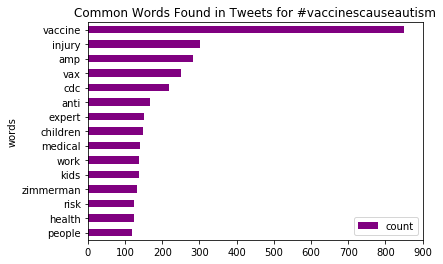

In [291]:
plotWordFreq(clean_tweets_autism_ncw, "for #vaccinescauseautism")

## 5.2.1 Calculating word frequency for #vaccineskill

In [292]:
killCleaned = [preprocessing(t) for t in kill_all['text']]

In [293]:
words_in_tweet_kill = [tweet.split() for tweet in killCleaned]

In [294]:
kill_nsw = removeStopwords(words_in_tweet_kill) # removing stopwords 
kill_collection = ["vaccines", "kill", "skill", "vaccine"]
kill_ncw = removeCollectionWords(kill_collection, kill_nsw) # get rid of collection words

In [295]:
counts_kill_ncw = tweetCounts(kill_ncw)
# table without collection words
clean_tweets_kill_ncw = pd.DataFrame(counts_kill_ncw.most_common(15),
                             columns=['words', 'count'])

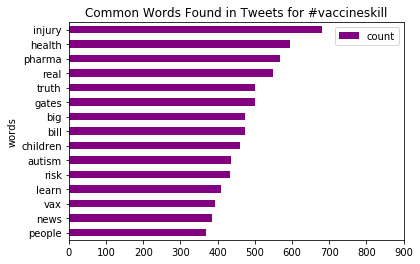

In [296]:
plotWordFreq(clean_tweets_kill_ncw, "for #vaccineskill")

## 5.2.2 Calculating word frequency for #vaccinesarepoison

In [297]:
poisonCleaned = [preprocessing(t) for t in poison_all['text']]

In [298]:
words_in_tweet_poison = [tweet.split() for tweet in poisonCleaned]

In [299]:
poison_nsw = removeStopwords(words_in_tweet_poison) # removing stopwords 
poison_collection = ["vaccines", "poison"]
poison_ncw = removeCollectionWords(poison_collection, poison_nsw) # get rid of collection words

In [300]:
counts_poison_ncw = tweetCounts(poison_ncw)
# table without collection words
clean_tweets_poison_ncw = pd.DataFrame(counts_poison_ncw.most_common(15),
                             columns=['words', 'count'])

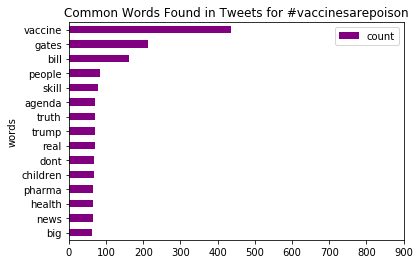

In [301]:
plotWordFreq(clean_tweets_poison_ncw, "for #vaccinesarepoison")

## 5.2.3 Calculating word frequency for #vaccineinjured

In [302]:
injuredCleaned = [preprocessing(t) for t in injured_all['text']]

In [303]:
words_in_tweet_injured = [tweet.split() for tweet in injuredCleaned]

In [304]:
injured_nsw = removeStopwords(words_in_tweet_injured) # removing stopwords 
injured_collection = ["vaccine", "injured"]
injured_ncw = removeCollectionWords(injured_collection, injured_nsw) # get rid of collection words

In [305]:
counts_injured_ncw = tweetCounts(injured_ncw)
# table without collection words
clean_tweets_injured_ncw = pd.DataFrame(counts_injured_ncw.most_common(15),
                             columns=['words', 'count'])

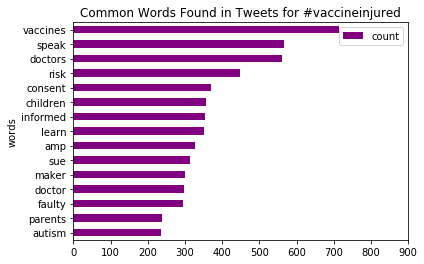

In [306]:
plotWordFreq(clean_tweets_injured_ncw, "for #vaccineinjured")

## 5.2.4 Calculating word frequency for #vaxxed

In [ ]:
vaxxedCleaned = [preprocessing(t) for t in vaxxed_all['text']]

In [ ]:
words_in_tweet_vaxxed = [tweet.split() for tweet in vaxxedCleaned]

In [ ]:
vaxxed_nsw = removeStopwords(words_in_tweet_vaxxed) # removing stopwords 
vaxxed_collection = ["vaxxed"]
vaxxed_ncw = removeCollectionWords(vaxxed_collection, vaxxed_nsw) # get rid of collection words

In [ ]:
counts_vaxxed_ncw = tweetCounts(vaxxed_ncw)
# table without collection words
clean_tweets_vaxxed_ncw = pd.DataFrame(counts_vaxxed_ncw.most_common(15),
                             columns=['words', 'count'])

In [ ]:
plotWordFreq(clean_tweets_vaxxed_ncw, "for #vaxxed")

## 5.3 Looking at bigrams in tweets
Looking at the tweets there are words that occur in conjunction with others. Bigrams also offer more detail in how different words relate to one another in tweets. Thus, we look at the bigrams in our tweets. The bigrams are calculated by looking at which words appear with roughly the same freqency in tweets. 

In [616]:
from nltk import bigrams

In [619]:
def bigramCount(data): 
    # Create list of lists containing bigrams in tweets
    terms_bigram = [list(bigrams(tweet)) for tweet in data]
    # Flatten list of bigrams in clean tweets
    bigrams_all = list(itertools.chain(*terms_bigram))

    # Create counter of words in clean bigrams
    bigram_counts = collections.Counter(bigrams_all)

    return bigram_counts

In [622]:
# View bigrams for tweets part of #vaccinescauseautism
autism_bigrams = bigramCount(autism_ncw)
autism_bigrams

Counter({('hear', 'well'): 40,
         ('well', 'parents'): 23,
         ('parents', 'kids'): 22,
         ('kids', 'giving'): 22,
         ('giving', 'testimonies'): 22,
         ('testimonies', 'learn'): 22,
         ('learn', 'risk'): 110,
         ('risk', 'vaccine'): 73,
         ('vaccine', 'injury'): 287,
         ('injury', 'informed'): 21,
         ('informed', 'consent'): 50,
         ('consent', 'human'): 21,
         ('human', 'rights'): 24,
         ('hillary', 'clinton'): 9,
         ('clinton', 'also'): 1,
         ('also', 'say'): 1,
         ('say', 'work'): 2,
         ('work', 'awareness'): 2,
         ('awareness', 'april'): 19,
         ('april', 'h'): 3,
         ('h', 'earth'): 3,
         ('earth', 'well'): 3,
         ('well', 'pandemic'): 2,
         ('nbc', 'news'): 3,
         ('news', 'awareness'): 1,
         ('april', 'cong'): 3,
         ('cong', 'bill'): 9,
         ('bill', 'posey'): 9,
         ('posey', 'cdc'): 9,
         ('cdc', 'whistleblower'): 

In [627]:
bigram_df_autism = pd.DataFrame(autism_bigrams.most_common(20),
                             columns=['bigram', 'count'])

bigram_df_autism

,bigram,count
0,"(vaccine, injury)",287
1,"(learn, risk)",110
2,"(vaccine, skill)",110
3,"(anti, vax)",107
4,"(vax, xed)",90
5,"(pro, vaccine)",82
6,"(cdc, whistleblower)",81
7,"(medical, expert)",78
8,"(risk, vaccine)",73
9,"(big, pharma)",62


In [624]:
# import necessary library
import networkx as nx

In [625]:
def networkGraph(bigram_df):
    # Create dictionary of bigrams and their counts
    d = bigram_df.set_index('bigram').T.to_dict('records')
    
    # Create network plot 
    G = nx.Graph()

    # Create connections between nodes
    for k, v in d[0].items():
        G.add_edge(k[0], k[1], weight= v )
    
    return G

In [626]:
def plotGraph(graph):
    fig, ax = plt.subplots(figsize=(10, 8))

    pos = nx.spring_layout(graph, k=2)

    # Plot networks
    nx.draw_networkx(graph, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

    # Create offset labels
    for key, value in pos.items():
        x, y = value[0]+.135, value[1]+.045
        ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
    plt.show()

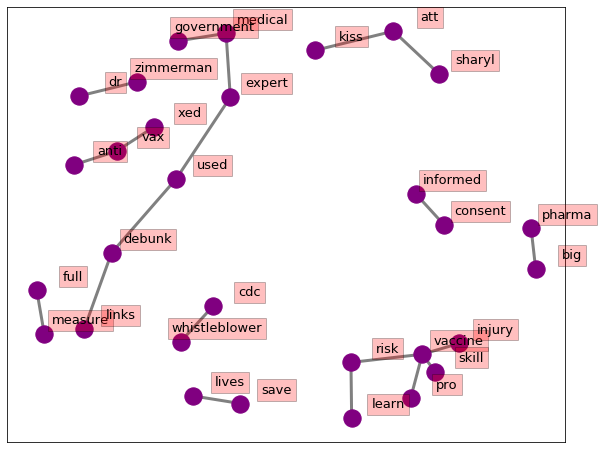

In [628]:
autismG = networkGraph(bigram_df_autism)
plotGraph(autismG)

### 5.3.1 Bigrams in tweets for #vaccinesarepoison

In [637]:
# View bigrams for tweets part of #vaccinesarepoison
poison_bigrams = bigramCount(poison_ncw)

In [638]:
bigram_df_poison = pd.DataFrame(poison_bigrams.most_common(20),
                             columns=['bigram', 'count'])

bigram_df_poison

,bigram,count
0,"(bill, gates)",149
1,"(vaccine, skill)",79
2,"(big, pharma)",45
3,"(donald, trump)",40
4,"(real, donald)",39
5,"(vaccine, agenda)",39
6,"(vaccine, injury)",28
7,"(gates, evil)",27
8,"(cause, autism)",24
9,"(plan, demic)",21


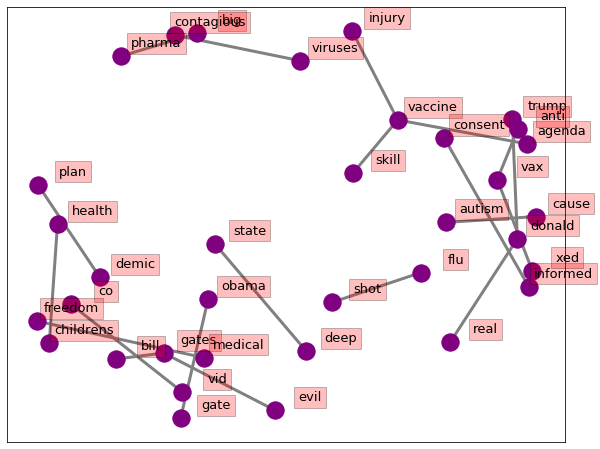

In [639]:
poisonG = networkGraph(bigram_df_poison)
plotGraph(poisonG)

### 5.3.2 Bigrams in tweets for #vaccineinjured

In [654]:
injured_bigrams = bigramCount(injured_ncw) # create counts of bigrams

In [655]:
bigram_df_injured = pd.DataFrame(injured_bigrams.most_common(20),
                             columns=['bigram', 'count'])
bigram_df_injured

,bigram,count
0,"(doctors, speak)",498
1,"(learn, risk)",348
2,"(informed, consent)",343
3,"(sue, maker)",300
4,"(speak, sue)",299
5,"(faulty, vaccines)",284
6,"(maker, doctor)",256
7,"(doctor, faulty)",255
8,"(risk, informed)",225
9,"(vax, xed)",97


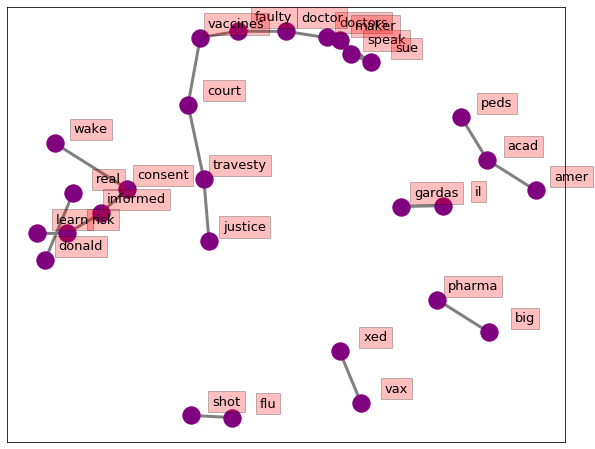

In [656]:
injuredG = networkGraph(bigram_df_injured)
plotGraph(injuredG)

### 5.3.3 Bigrams in tweets for #vaccineskill

In [657]:
kill_bigrams = bigramCount(kill_ncw) # create counts of bigrams

In [658]:
bigram_df_kill = pd.DataFrame(kill_bigrams.most_common(20),
                             columns=['bigram', 'count'])
bigram_df_kill

,bigram,count
0,"(bill, gates)",406
1,"(big, pharma)",388
2,"(learn, risk)",372
3,"(real, donald)",261
4,"(donald, trump)",253
5,"(informed, consent)",205
6,"(vax, xed)",170
7,"(risk, injury)",146
8,"(childrens, health)",146
9,"(cause, autism)",134


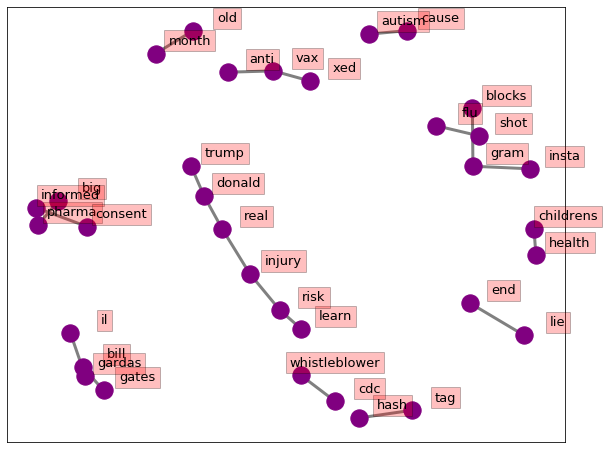

In [659]:
killG = networkGraph(bigram_df_kill)
plotGraph(killG)

## 5.4 Wordcloud visualization of frequent words
After having identified the most frequent words we look for a different visualization method of our data and the most popular terms. As seen in other papers, we use the Wordcloud library to create a word with frequent terms

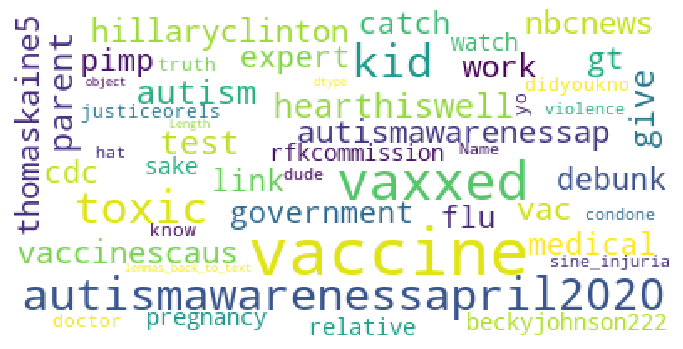

In [575]:
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=100
                         ).generate(str(all_data_rt.lemmas_back_to_text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

# 6. Topic modeling
Topic modeling is an unsupervised learning algorithm that allows to identify topics within texts. To get a better grasp of what topics are popular in our collected tweets we try to identify overarching topics using the Python library pyLDAvis that uses Latent Dirichlet Allocation, a type of topic modeling. 

In [660]:
# import necessary libraries 
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [661]:
# create vectorizer objec
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

### 6.1.1 Modeling for #vaccinescauseautism

In [676]:
joinedAutismTweets = [" ".join(autism_ncw[i]) for i in range(len(autism_ncw))] # joining so each tweet is one list

# convert the documents into a document-term matrix
dtm_tf_autism = tf_vectorizer.fit_transform(joinedAutismTweets)


# retrieve the terms found in the corpora
tokens = tf_vectorizer.get_feature_names()


In [704]:
tokens[:5] # some of the terms identified

['actually', 'admits', 'admitted', 'adults', 'aluminum']

In [706]:
# use the Tfidf scores instead of Tf in the document-term matrix
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf_autism= tfidf_vectorizer.fit_transform(joinedAutismTweets)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


In [678]:
def wm2df(wm, feat_names):
    """ 
    creates a document term matrix dataframe from a document term matrix and corresponding features
    """
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

In [679]:
dataframe_autism = wm2df(dtm_tf_autism, tokens)

In [680]:
dataframe_autism.head()

,actually,admits,admitted,adults,aluminum,america,american,amp,andrew,answer,...,wrong,xed,xer,xers,yeah,year,years,yes,youtube,zimmerman
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now we fit two LDA models, each with 3 topics:

In [709]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=3, random_state=0)
lda_tf.fit(dtm_tf_autism)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=3, random_state=0)
lda_tfidf.fit(dtm_tfidf_autism)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

After creating the models we visualize them using sklearn:

In [703]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf_autism, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.165473  0.199225       1        1  55.760000
1     -0.276978  0.027676       2        1  23.493836
2      0.111505 -0.226901       3        1  20.746164, topic_info=            Term        Freq       Total Category  logprob  loglift
334      vaccine  830.000000  830.000000  Default  30.0000  30.0000
150  information  108.000000  108.000000  Default  29.0000  29.0000
183        links   97.000000   97.000000  Default  28.0000  28.0000
240          pro   94.000000   94.000000  Default  27.0000  27.0000
103       expert  154.000000  154.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
163         kids   41.333967  133.519807   Topic3  -4.1523   0.4002
157       injury   50.187168  296.888168   Topic3  -3.9583  -0.2048
58       consent   30.117580   55.567671   Topic3  -4.4689   0.9603
151     informed   29.293592   56.460059   Topic3  -4.4967   0.9166
334      vaccine   51.857638  830.212217   Topic3  -3.9255  -1.2004

[159 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         2  0.979132     admits
2         3  0.977129   admitted
7         1  0.269958        amp
7         2  0.475979        amp
7         3  0.255750        amp
...     ...       ...        ...
350       1  0.990426        xed
350       3  0.011652        xed
352       1  0.982328       xers
358       2  0.634357  zimmerman
358       3  0.358225  zimmerman

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [710]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf_autism, tfidf_vectorizer)

PreparedData(topic_coordinates=              x        y  topics  cluster       Freq
topic                                               
0     -0.165557  0.15102       1        1  48.068281
2     -0.073084 -0.19582       2        1  26.898203
1      0.238640  0.04480       3        1  25.033516, topic_info=            Term       Freq       Total Category  logprob  loglift
150  information  26.000000   26.000000  Default  30.0000  30.0000
296        study  24.000000   24.000000  Default  29.0000  29.0000
260         risk  33.000000   33.000000  Default  28.0000  28.0000
172        learn  32.000000   32.000000  Default  27.0000  27.0000
240          pro  22.000000   22.000000  Default  26.0000  26.0000
..           ...        ...         ...      ...      ...      ...
7            amp  30.553868   54.463598   Topic3  -3.4159   0.8069
334      vaccine  49.884079  111.364984   Topic3  -2.9257   0.5818
358    zimmerman  18.598963   27.448804   Topic3  -3.9123   0.9957
157       injury  26.835456   56.260943   Topic3  -3.5456   0.6447
201      medical  11.278967   31.921209   Topic3  -4.4124   0.3446

[164 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         3  0.969514     admits
2         2  0.909518   admitted
7         1  0.257052        amp
7         2  0.183609        amp
7         3  0.569188        amp
...     ...       ...        ...
350       2  0.130727        xed
352       1  0.973585       xers
355       1  0.945886      years
358       2  0.327883  zimmerman
358       3  0.692198  zimmerman

[175 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

### 6.2 Modeling functions 
To automate the process of creating both a model for the TF-IDF and TF variants we summarized the steps in the following two functions:

In [729]:
def tfidf_model(dataset, numComp):
    """
    create a tf-idf model and plots it with numComp number of components
    """
    tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
    tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
    dtm_tfidf = tfidf_vectorizer.fit_transform(dataset)
    
    lda_tfidf = LatentDirichletAllocation(n_components=numComp, random_state=0)
    lda_tfidf.fit(dtm_tfidf) # fitting model
    return pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [725]:
def tf_model(dataset, numComp): 
    """
    create a tf model and plots it with numComp number of components
    """
    tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
    dtm_tf = tf_vectorizer.fit_transform(dataset)
    lda_tf = LatentDirichletAllocation(n_components=numComp, random_state=0)
    lda_tf.fit(dtm_tf)
    return pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

### 6.3 Topic modeling for different hashtags 
Using our functions defined above we use the models to investigate the topics in our datasets.

#### 6.3.1 Model for #vaccinesarepoison

In [727]:
joinedPoisonTweets = [" ".join(poison_ncw[i]) for i in range(len(poison_ncw))]

In [753]:
tfidf_model(joinedPoisonTweets, 6)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.014811 -0.035152       1        1  24.346735
0     -0.159946 -0.013209       2        1  18.790217
2     -0.138734 -0.024325       3        1  16.638911
1      0.210613  0.109464       4        1  14.444510
4      0.136582 -0.177948       5        1  14.003358
3     -0.033705  0.141169       6        1  11.776269, topic_info=           Term       Freq      Total Category  logprob  loglift
63        gates  47.000000  47.000000  Default  30.0000  30.0000
161       trump  21.000000  21.000000  Default  29.0000  29.0000
174     viruses  13.000000  13.000000  Default  28.0000  28.0000
48       donald  13.000000  13.000000  Default  27.0000  27.0000
29   contagious  10.000000  10.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
145       skill   3.346508  21.204438   Topic6  -4.0985   0.2928
4        agenda   2.810054  21.267683   Topic6  -4.2732   0.1151
138      safety   2.053002  11.150202   Topic6  -4.5871   0.4469
175        wake   2.140493  13.055104   Topic6  -4.5453   0.3309
21        cause   2.140285  15.043281   Topic6  -4.5454   0.1891

[258 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1         1  0.588331   aborted
1         2  0.196110   aborted
1         3  0.196110   aborted
2         1  0.200198  actually
2         2  0.400396  actually
...     ...       ...       ...
183       1  0.818706     years
184       1  0.237108   youtube
184       2  0.118554   youtube
184       4  0.237108   youtube
184       6  0.355663   youtube

[456 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 3, 2, 5, 4])

In [ ]:
tf_model(joinedPoisonTweets, 6)

#### 6.3.2 Model for #vaccineskill

In [754]:
joinedKillTweets = [" ".join(kill_ncw[i]) for i in range(len(kill_ncw))]
tfidf_model(joinedKillTweets, 7)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.092047 -0.003270       1        1  20.706199
6      0.096623 -0.081161       2        1  19.030261
4      0.096953 -0.040360       3        1  12.901912
5      0.031582  0.035855       4        1  12.343361
2      0.036610  0.209167       5        1  12.178230
1      0.002153 -0.110388       6        1  12.001727
0     -0.355967 -0.009843       7        1  10.838309, topic_info=           Term        Freq       Total Category  logprob  loglift
585       learn   96.000000   96.000000  Default  30.0000  30.0000
885        risk  100.000000  100.000000  Default  29.0000  29.0000
738         old   46.000000   46.000000  Default  28.0000  28.0000
689       month   39.000000   39.000000  Default  27.0000  27.0000
1050      trump   63.000000   63.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
327        exit    9.108224   12.174220   Topic7  -5.0599   1.9319
364   following   15.865305   32.580142   Topic7  -4.5050   1.5025
234       death   19.655857   56.345412   Topic7  -4.2908   1.1690
517      injury   23.071715  118.893031   Topic7  -4.1305   0.5825
31          amp   15.249008   55.255828   Topic7  -4.5446   0.9346

[435 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
0         2  0.149308              able
0         3  0.746540              able
0         4  0.149308              able
2         2  0.170294          abortion
2         3  0.681174          abortion
...     ...       ...               ...
1146      7  0.950926  yearolddiesafter
1147      1  0.634819             years
1147      2  0.141071             years
1147      5  0.211606             years
1149      5  0.915637         yoboydied

[916 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 5, 6, 3, 2, 1])

In [752]:
tf_model(joinedKillTweets, 6)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.071355 -0.027617       1        1  26.057365
2     -0.049753  0.023874       2        1  16.308000
1     -0.028074 -0.231561       3        1  16.141976
4     -0.076699 -0.047531       4        1  15.931626
5     -0.128090  0.230354       5        1  14.229829
0      0.353972  0.052481       6        1  11.331204, topic_info=        Term        Freq       Total Category  logprob  loglift
885     risk  431.000000  431.000000  Default  30.0000  30.0000
585    learn  406.000000  406.000000  Default  29.0000  29.0000
389    gates  490.000000  490.000000  Default  28.0000  28.0000
1050   trump  323.000000  323.000000  Default  27.0000  27.0000
442   health  580.000000  580.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
31       amp   78.799999  279.946475   Topic6  -4.2272   0.9099
990    study   44.678588  107.329762   Topic6  -4.7947   1.3012
886    risks   37.643161   65.162728   Topic6  -4.9660   1.6289
1145    year   37.146534   67.846073   Topic6  -4.9793   1.5752
158    chris   37.220590   72.847698   Topic6  -4.9773   1.5061

[385 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
1         3  0.937547           aborted
1         5  0.056821           aborted
4         2  0.950843             abuse
17        4  0.957307            africa
19        1  0.046513            agenda
...     ...       ...               ...
1145      2  0.235828              year
1145      6  0.545352              year
1146      6  0.986442  yearolddiesafter
1149      2  0.958807         yoboydied
1150      2  0.965097              york

[675 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 6, 1])

#### 6.3.3 Model for #vaccineinjured

In [758]:
joinedInjuredTweets = [" ".join(injured_ncw[i]) for i in range(len(injured_ncw))]
tf_model(joinedInjuredTweets, 6)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.123993  0.270966       1        1  25.376935
0      0.111919  0.265832       2        1  19.860296
2      0.148291 -0.200327       3        1  16.249718
3      0.223996 -0.257492       4        1  15.179500
4     -0.320569 -0.040001       5        1  11.933805
1     -0.287629 -0.038978       6        1  11.399747, topic_info=        Term        Freq       Total Category  logprob  loglift
426    speak  560.000000  560.000000  Default  30.0000  30.0000
124  doctors  555.000000  555.000000  Default  29.0000  29.0000
386     risk  447.000000  447.000000  Default  28.0000  28.0000
123   doctor  295.000000  295.000000  Default  27.0000  27.0000
440      sue  311.000000  311.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
123   doctor   59.607456  295.104638   Topic6  -3.6036   0.5720
377   report   16.584748   41.684355   Topic6  -4.8829   1.2499
231   injury   25.000724  169.863925   Topic6  -4.4725   0.2555
438    study   21.982290  194.931640   Topic6  -4.6012  -0.0108
318    nurse   12.990530   20.394640   Topic6  -5.1272   1.7205

[334 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         5  0.202643        aap
0         6  0.781625        aap
1         5  0.931988   abortion
3         6  0.986713       acad
4         6  0.978058  according
...     ...       ...        ...
517       2  0.064063        xed
517       4  0.213542        xed
518       2  0.925463        xer
519       1  0.134718       xers
519       2  0.841989       xers

[411 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 3, 4, 5, 2])

In [759]:
tfidf_model(joinedInjuredTweets, 6)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.093640  0.123296       1        1  21.237909
0      0.045227  0.173407       2        1  20.982977
1     -0.390237 -0.001864       3        1  18.148742
2      0.062321 -0.159649       4        1  14.212993
3      0.087862 -0.263678       5        1  13.836273
4      0.101187  0.128487       6        1  11.581106, topic_info=         Term        Freq       Total Category  logprob  loglift
440       sue   93.000000   93.000000  Default  30.0000  30.0000
278     maker   91.000000   91.000000  Default  29.0000  29.0000
157    faulty   90.000000   90.000000  Default  28.0000  28.0000
123    doctor   87.000000   87.000000  Default  27.0000  27.0000
124   doctors  111.000000  111.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
332   parents    7.316271   45.313597   Topic6  -4.4114   0.3323
76   children    7.505983   59.625867   Topic6  -4.3858   0.0834
485  vaccines    8.092614  116.532324   Topic6  -4.3105  -0.5114
231    injury    5.666522   37.263932   Topic6  -4.6669   0.2723
433      stop    4.937351   17.585752   Topic6  -4.8046   0.8855

[345 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         3  0.911758        aap
1         6  0.778219   abortion
3         3  0.945399       acad
4         3  0.876435  according
7         5  0.920484      acute
...     ...       ...        ...
519       1  0.230498       xers
519       2  0.806742       xers
521       2  0.283088      years
521       4  0.188725      years
521       6  0.566175      years

[495 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 2, 3, 4, 5])

#### 6.3.4 Model for #vaxxed

In [745]:
vaxxedList = [str(vaxxed_all['text'][i]) for i in range(len(vaxxed_all['text']))]

['@JohnLeguizamo Please help the families of NJ preserve their constitutional rights! Latinos are behind harmed at alarming numbers. minorities are not doing their homework and giving their rights away. Please help us fight for our families #veto2173 https://t.co/E8CNbVJV2M #VAXXED',
 'Wow!!!😮 Just listen....👇👇👇\n\n#Vaxxed https://t.co/QjV5bzgLvF',
 "If you like my tweets, almost every tweet I've ever sent is backed up on my website. It's a snapshot of the last decade.\nThere are also embedded tweets from some of the smartest people I've ever encountered online.\nTopics: #vaxxed #politics #health #news\n\nhttps://t.co/igetkfyna9",
 "This directly applies to current day topics:\n\n⚡Forced &amp; mandated Vaccines\n⚡Left Liberal Political 'Correctness'\n⚡Forced banning of Homeopathy and other holistic medicine systems in US\n\n#VaccineInjury #VaccineExtremists #Vaxxed https://t.co/hSqGoMkvwa",
 '@TheDailyShow @RepAdamSchiff #Patriots stand with Trump and improved US-Russian relations. #17

In [746]:
tfidf_model(vaxxedList, 3)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.018640 -0.194668       1        1  37.053322
1     -0.163767  0.113057       2        1  35.504606
0      0.182407  0.081611       3        1  27.442071, topic_info=              Term        Freq        Total Category  logprob  loglift
3518       praybig  694.000000   694.000000  Default  30.0000  30.0000
3528      pregnant  680.000000   680.000000  Default  29.0000  29.0000
361           baby  691.000000   691.000000  Default  28.0000  28.0000
323    autismmedia  491.000000   491.000000  Default  27.0000  27.0000
3370     periscope  443.000000   443.000000  Default  26.0000  26.0000
...            ...         ...          ...      ...      ...      ...
176            amp  137.099302   504.947627   Topic3  -5.3863  -0.0107
2956           mmr  113.774438   224.171939   Topic3  -5.5728   0.6149
5226       youtube  117.085399   258.807055   Topic3  -5.5441   0.4999
2340        injury  106.366875   222.700204   Topic3  -5.6401   0.5542
4915  vaccineswork  111.823095  1017.942290   Topic3  -5.5901  -0.9155

[218 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
161       2  0.094042  aluminum
161       3  0.909069  aluminum
166       2  0.014501    amazon
166       3  0.986059    amazon
176       1  0.223786       amp
...     ...       ...       ...
5168      2  0.010693     women
5168      3  0.021386     women
5226      1  0.003864   youtube
5226      2  0.544807   youtube
5226      3  0.452074   youtube

[329 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

#### 6.3.5 Model for all hashtags combined

In [749]:
allDataList = [str(all_data['text'][i]) for i in range(len(all_data['text']))]


In [760]:
tfidf_model(allDataList, 6)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.043892  0.101001       1        1  21.814226
1     -0.060110  0.045886       2        1  21.260598
2     -0.044024  0.052849       3        1  17.560869
0      0.017837  0.083700       4        1  15.663859
5     -0.128456 -0.210112       5        1  12.543265
4      0.258646 -0.073325       6        1  11.157184, topic_info=              Term        Freq       Total Category  logprob  loglift
4051       praybig  751.000000  751.000000  Default  30.0000  30.0000
364    autismmedia  525.000000  525.000000  Default  29.0000  29.0000
3884     periscope  473.000000  473.000000  Default  28.0000  28.0000
4064      pregnant  688.000000  688.000000  Default  27.0000  27.0000
1846     expecting  539.000000  539.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
358         autism  119.004637  839.314117   Topic6  -4.8586   0.2397
3008  learntherisk   78.221551  420.352766   Topic6  -5.2782   0.5115
5709     vaxwithme   73.510343  329.926698   Topic6  -5.3403   0.6916
1295         death   64.832244  205.423133   Topic6  -5.4659   1.0398
2517           hpv   63.308492  422.066041   Topic6  -5.4897   0.2959

[445 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
65        4  0.947513     adem
92        1  0.843906  adverse
92        2  0.111693  adverse
92        3  0.024821  adverse
92        5  0.012410  adverse
...     ...       ...      ...
6017      4  0.055771  youtube
6017      5  0.452729  youtube
6017      6  0.305100  youtube
6020      5  0.036371  zealand
6020      6  0.945642  zealand

[995 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1, 6, 5])

# 7. Interpreting spikes in data
From our earlier plotting of the tweets over time, we saw that that there were three spikes. One around September 2017, another one around March 2019 and a more recent spike around May 2020. To explain the occurances of these spikes we will look at the subset of tweets occuring at these dates.

In [612]:
import datetime

## 7.1 Tweets between March and June 2020
The first spike we will examine is the timeframe from March 2020 and June 2020. We hypothesize that the spike has to do with the Coronavirus epidemic which started playing a major role in the United States at the start of March 2020.

In [613]:
# dates from March to June 2020
dt1 = datetime.datetime(2020, 3, 1, 0, 0)
dt2 = datetime.datetime(2020, 6, 30, 0, 0)

In [617]:
#subset of data created before end of June 2020
beforeJune = all_data2020[all_data2020.created_at < dt2]

In [619]:
# subset of data that includes tweets between March and June 2020
subset2020 = beforeJune[beforeJune.created_at > dt1]

In [620]:
subset2020.sort_values("created_at") # check to see if data actually a subset from March to June

,tweet_id,name,screen_name,acctdesc,text,usercreated,created_at,favourite_count,retweet_count,hashtags,status_count,followers_count,following_count,location,source_device
6782,1233910048499339265,Sunshine,lightbearer0326,I am a proud Vaccine Toxin Risk Advocate. Brin...,@DrPanMD @CDCgov You secured 50 million becaus...,2019-08-14 19:07:10,2020-03-01 00:20:55,1,0,"[{'text': 'InjectionIsInfection', 'indices': [...",1673,401,498,NaN,Twitter for iPhone
8567,1233928906685599744,Neal Hatgi,HatgiNeal,"Fan of @Gracevanderwaal and @JRRTolkien, bare ...",Power back in the hands of the people! A great...,2019-06-12 10:25:56,2020-03-01 01:35:51,0,0,"[{'text': 'BigPharma', 'indices': [67, 77]}, {...",1640,375,979,NaN,Twitter Web App
4580,1233942987610021888,"Dr. Thomas Paul, Therapist #MindBody",DrThomasPaul,Past Life Regression Center® Founder; Therapis...,Clean up your community/household no matter wh...,2013-06-30 20:22:18,2020-03-01 02:31:48,26,15,"[{'text': 'coronavirus', 'indices': [64, 76]},...",86936,65007,58953,NaN,Twitter Web App
9640,1233951241824325632,LotusOak,LotusOak2,"❦ God, please give me the grace to accept the ...",A government medical expert - used to debunk l...,2011-11-30 01:40:51,2020-03-01 03:04:36,11,19,"[{'text': 'vaccines', 'indices': [59, 68]}, {'...",94097,43621,38621,NaN,Vaccines and Homeopathy News
6233,1233972565577650177,Woke Warrior ❌ - Flat Earth Global™ (Official),warriorofwoke,High IQ inelectual #flatearth scientist and #a...,Recently a #BigPharma rep came to give a talk ...,2017-04-06 02:22:18,2020-03-01 04:29:20,18,0,"[{'text': 'BigPharma', 'indices': [11, 21]}, {...",6364,3009,548,NaN,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,1277644763760668675,zero phux given,MotorcyclesRat,"I don't care what colour you are, what God yo...","That's fine for you to say, but when you have ...",2017-05-26 21:04:53,2020-06-29 16:47:03,0,0,"[{'text': 'VAXXED', 'indices': [184, 191]}]",681,21,74,NaN,Twitter for Android
8229,1277657069026283520,Fighting4Freedom,yattypat,"One nation, under drugs, with slavery and sick...","@and_kell @LimaFx If you haven't yet, please l...",2009-05-21 14:10:21,2020-06-29 17:35:57,1,0,"[{'text': 'vaccineskill', 'indices': [141, 154]}]",4350,3274,3481,NaN,Twitter for Android
8233,1277672231988940800,Suzi Q Patriot Anti-VAX Mom,SuziPatriot,I live in Chinafornia. I'm a REAL PERSON & OC ...,#FauciTheFraud #FauciLiedPeopleDied #BillGates...,2015-07-13 21:50:12,2020-06-29 18:36:12,0,1,"[{'text': 'FauciTheFraud', 'indices': [0, 14]}...",3122,516,510,NaN,Twitter Web App
2501,1277692042248744961,Queen of Stars 🌟🌟🌟,QueenofStars13,🌟12th Dimensional Wisdom🌟Experiencing Earthlif...,@Mike_Pence @WhiteHouse Please outlaw CovID #V...,2018-01-19 17:42:34,2020-06-29 19:54:55,0,0,"[{'text': 'VaXxed', 'indices': [44, 51]}, {'te...",49057,2117,2044,NaN,Twitter Web App


In [ ]:
# cleaning data to make sure we can extract top words 
data2020Cleaned = [preprocessing(t) for t in subset2020['text'] ]
words_in_tweet_2020 = [tweet.split() for tweet in data2020Cleaned]

In [ ]:
data2020_nsw = removeStopwords(words_in_tweet_2020) # removing stopwords 
data2020_collection = ["vaccines", "vaccine", "vax", "xed", "injured", "autism"]
data2020_ncw = removeCollectionWords(data2020_collection, data2020_nsw) # get rid of collection words
counts_data2020_ncw = tweetCounts(data2020_ncw)
# table without collection words
clean_tweets_data2020_ncw = pd.DataFrame(counts_data2020_ncw.most_common(15),
                             columns=['words', 'count'])

In [ ]:
clean_tweets_data2020_ncw

## 7.2 Examination of tweets between February and April 2019
A big spike in the number of tweets also occured during the time period of occured during February and April 2019. 

In [ ]:
# dates from March to June 2020
date1_2019 = datetime.datetime(2019, 2, 1, 0, 0)
date2_2019 = datetime.datetime(2019, 4, 30, 0, 0)

In [ ]:
#subset of data created before end of June 2020
afterFeb = all_data[all_data.created_at > date1_2019]
subset2019 = afterFeb[afterFeb.created_at < date2_2019]

In [ ]:
# cleaning data to make sure we can extract top words 
data2019Cleaned = [preprocessing(t) for t in subset2019['text'] ]
words_in_tweet_2019 = [tweet.split() for tweet in data2019Cleaned]

In [ ]:
data2019_nsw = removeStopwords(words_in_tweet_2019) # removing stopwords 
data2019_collection = ["vaccines", "vaccine", "vax", "xed", "injured", "autism"]
data2019_ncw = removeCollectionWords(data2019_collection, data2019_nsw) # get rid of collection words
counts_data2019_ncw = tweetCounts(data2019_ncw)
# table without collection words
clean_tweets_data2019_ncw = pd.DataFrame(counts_data2019_ncw.most_common(15),
                             columns=['words', 'count'])